In [1]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import glob

import pickle as pkl
import yaml

from pyoperators import *
from pysimulators.interfaces.healpy import HealpixConvolutionGaussianOperator

import qubic
from qubic.scripts.MapMaking.src.FMM import pipeline

%matplotlib inline

# Nsub_in

In [ ]:
# Initialize pipeline arguments
    
with open('/home/laclavere/Documents/Thesis/qubic/qubic/scripts/Forecast_Bmodes/Nsub in & out/params.yml', 'r') as file:
    params = yaml.safe_load(file)
    
comm = MPI.COMM_WORLD

file = '/home/laclavere/Documents/Thesis/qubic/qubic/scripts/Forecast_Bmodes/Nsub in & out'

In [ ]:
stop

# Nsub_out

In [2]:
ifreq = 0
istk = 1

/home/laclavere/miniconda3/envs/venv-qubic/lib/python3.9/site-packages/pysimulators/interfaces/healpy/operators.py:336: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  output.T[...] = hp.smoothing(


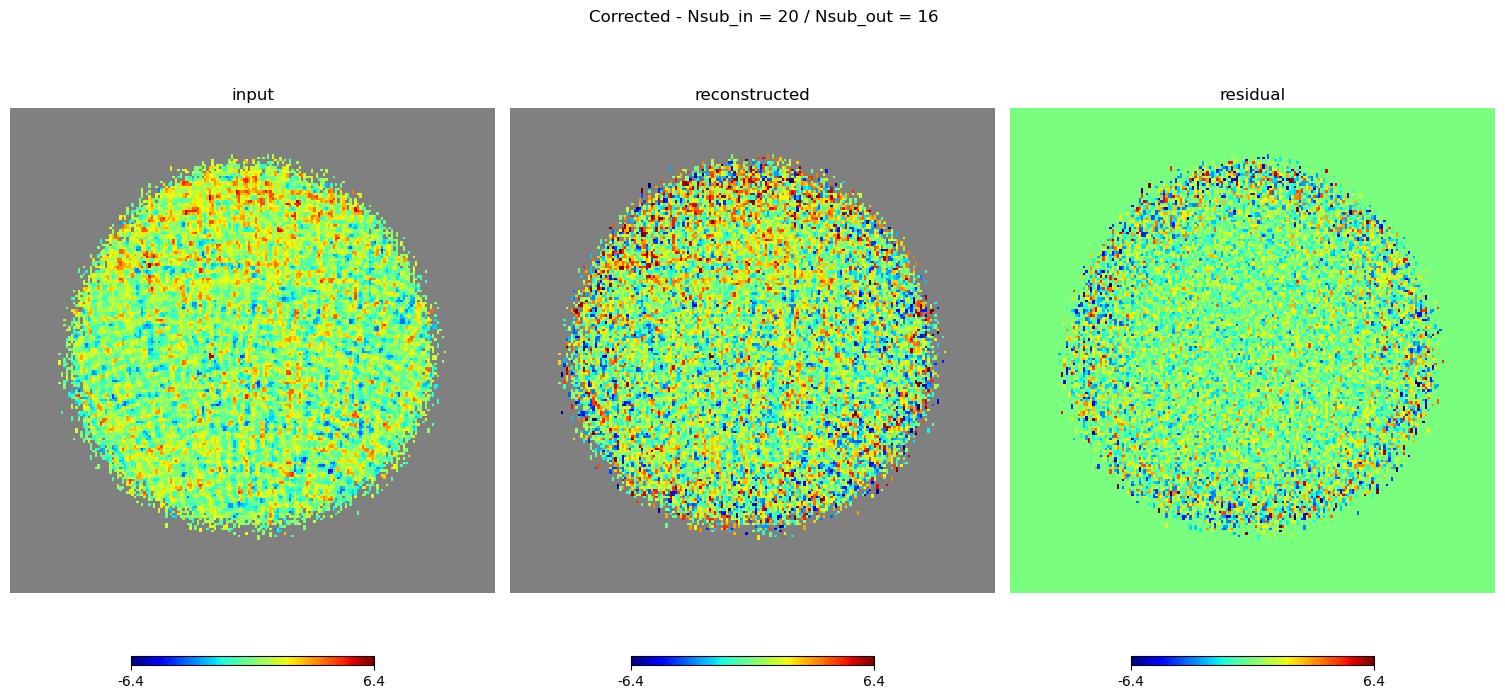

In [6]:
pkl_test = pkl.load(open('/home/laclavere/Documents/Thesis/Pipeline/testmaps/FastSim_wo_convolutions_nsub_in=20_out=20_None.pkl', 'rb'))
map_test = pkl_test['maps']
input_map_test = pkl_test['maps_in']

plt.figure(figsize=(15,8))
plt.axis("off")
plt.title('Corrected - Nsub_in = 20 / Nsub_out = 16')

coverage = pkl_test['coverage']
covnorm = coverage / coverage.max()
seenpix = covnorm > 0.2

map_test[:, ~seenpix, :] = hp.UNSEEN
input_map_test[:, ~seenpix, :] = hp.UNSEEN

sigma = np.max([np.std(input_map_test[ifreq, seenpix, istk]), np.std(map_test[ifreq, seenpix, istk])])
n = 2
C = HealpixConvolutionGaussianOperator(pkl_test['fwhm_rec'][ifreq])
C_test = HealpixConvolutionGaussianOperator(0.001)

hp.gnomview(C*input_map_test[ifreq, :, istk],min=-n*sigma, max=n*sigma, rot=pkl_test['center'],reso=15, notext=True, cmap='jet', title='input', sub=(1, 3, 1))
hp.gnomview(C_test*map_test[ifreq, :, istk],min=-n*sigma, max=n*sigma, rot=pkl_test['center'], reso=15, notext=True, cmap='jet', title='reconstructed', sub=(1, 3, 2))
hp.gnomview(C*input_map_test[ifreq, :, istk]-C_test*map_test[ifreq, :, istk],min=-n*sigma, max=n*sigma, rot=pkl_test['center'], reso=15, notext=True, cmap='jet', title='residual', sub=(1, 3, 3))

In [4]:
pkl_list_wo = []
nsub_wo = ['4', '8', '12', '16', '20']
for i in nsub_wo:
    path = glob.glob(f'/pbs/home/t/tlaclave/sps/FMM_data/test/maps/noiseless_wo_convolutions_nsub_in=20_out={i}*')[0]
    pkl_ = pkl.load(open(path, 'rb'))
    pkl_list_wo.append(pkl_)

In [5]:
pkl_list_w = []
nsub_w = ['4', '8', '12', '16', '20']
for i in nsub_w:
    path = glob.glob(f'/pbs/home/t/tlaclave/sps/FMM_data/test/maps/noiseless_w_convolutions_nsub_in=20_out={i}*')[0]
    pkl_ = pkl.load(open(path, 'rb'))
    pkl_list_w.append(pkl_)

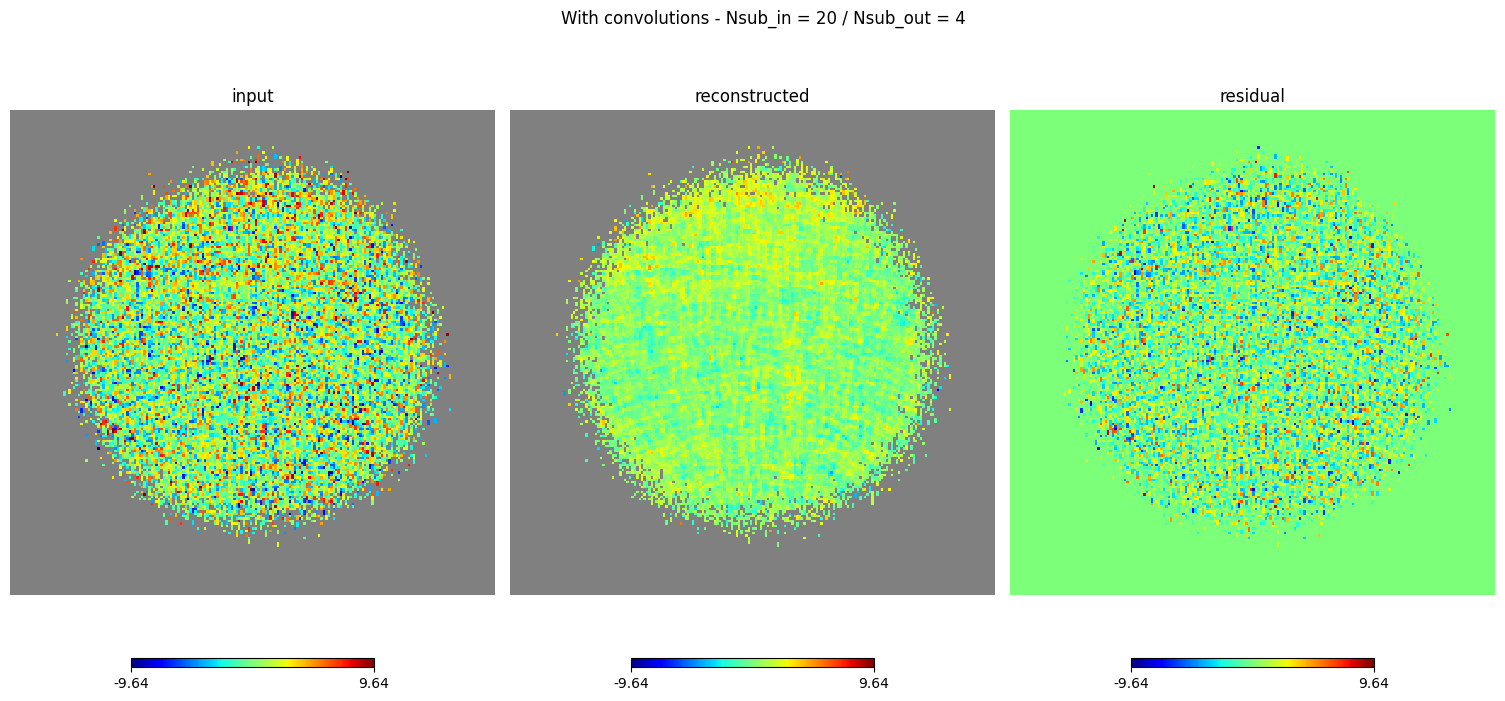

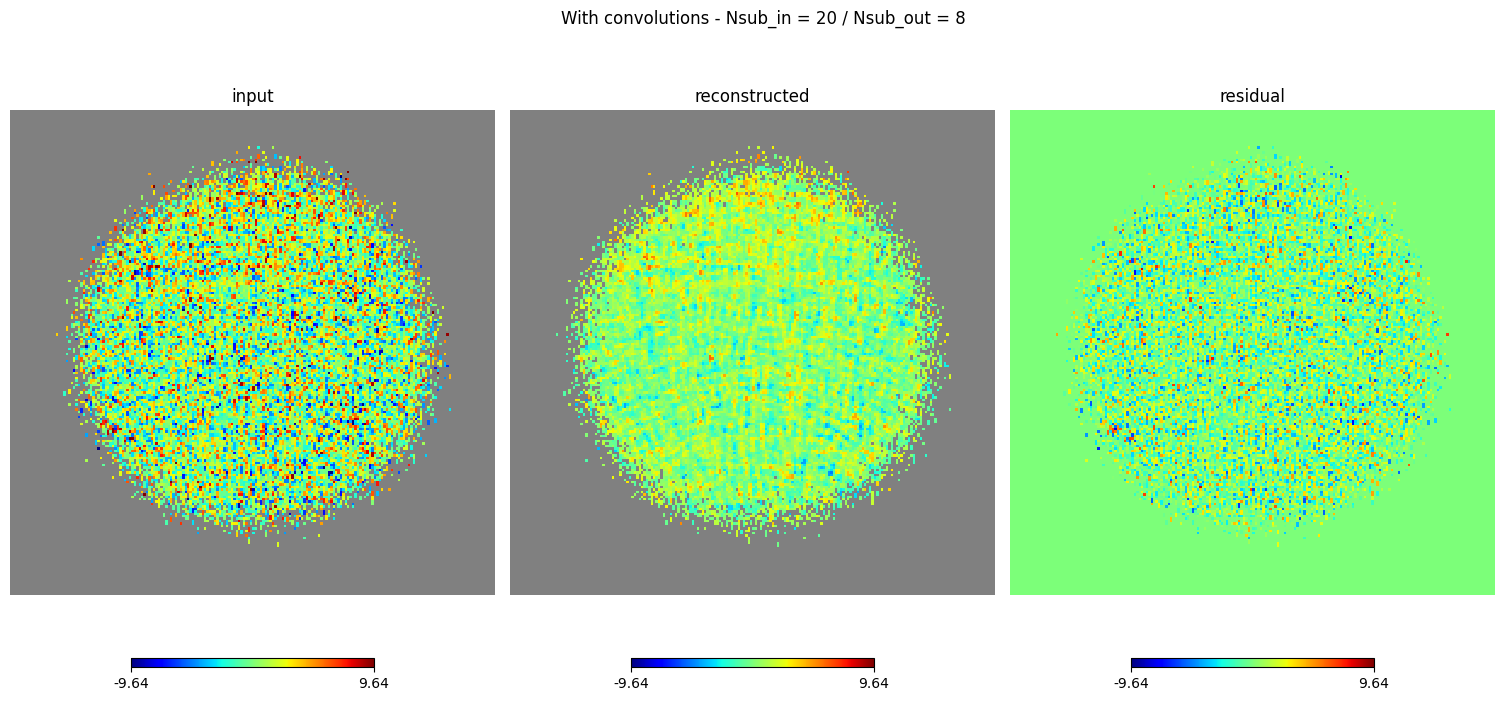

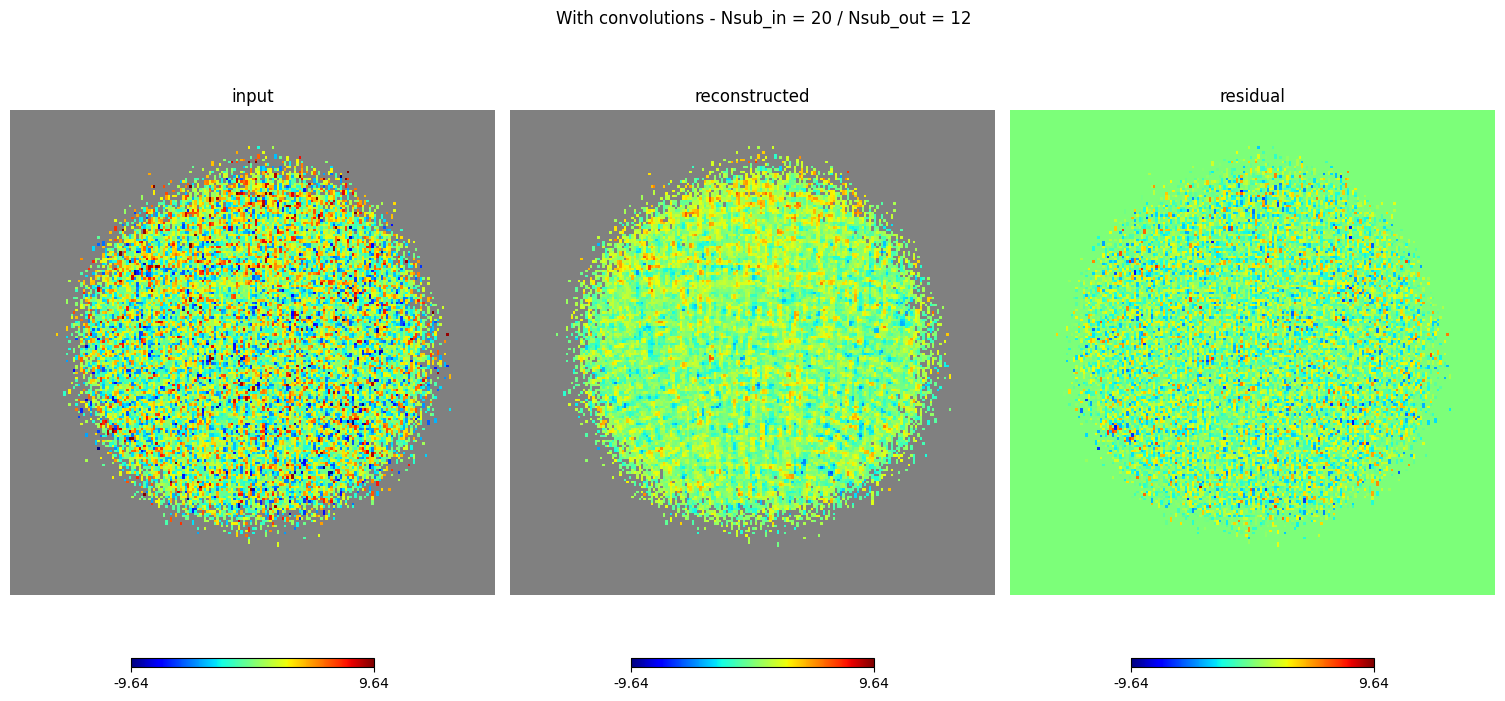

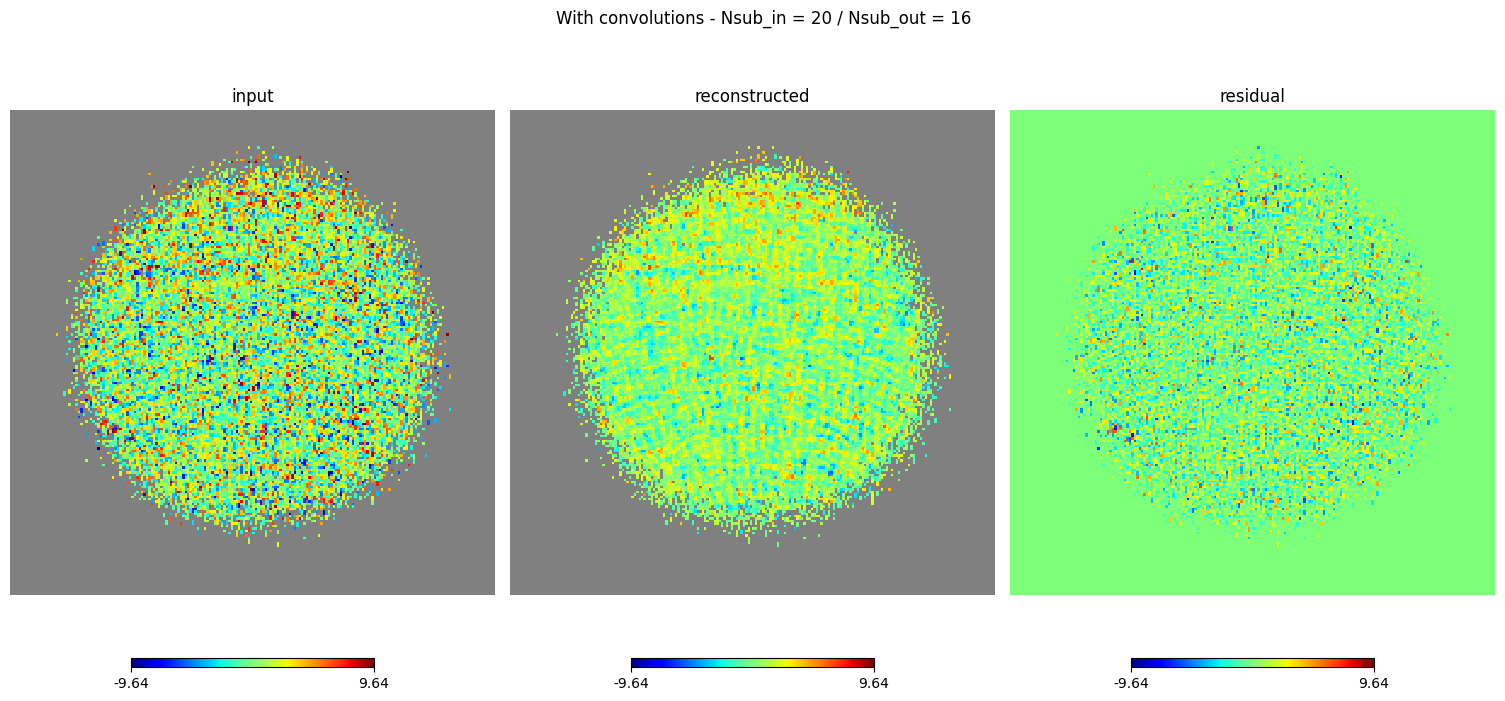

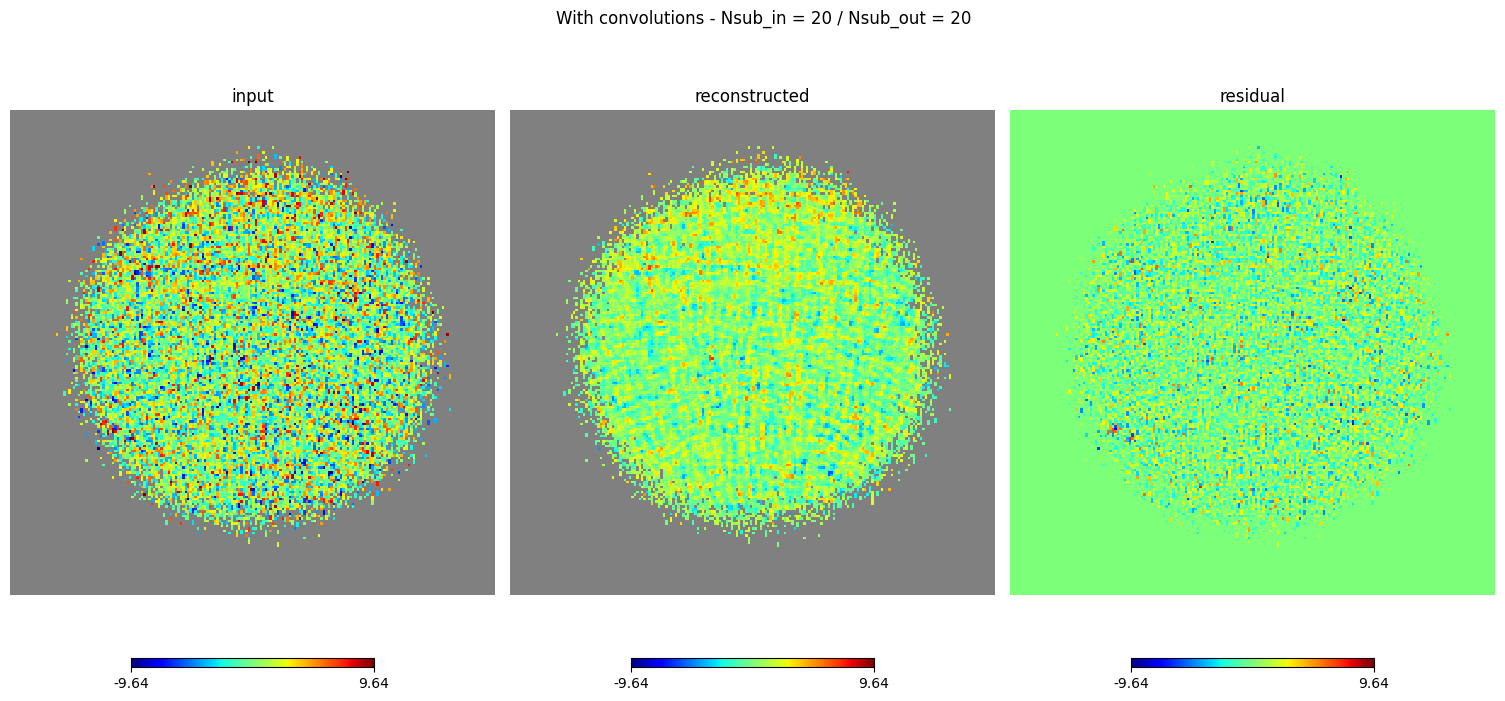

In [6]:
hist_list = []
for i in range(len(pkl_list_w)):
    plt.figure(figsize=(15,8))
    plt.axis("off")
    plt.title('With convolutions - Nsub_in = 20 / Nsub_out = ' + nsub_w[i])
    pkl_file = pkl_list_w[i]

    maps = pkl_file['maps']
    input_maps = pkl_file['maps_in']
    
    coverage = pkl_file['coverage']
    covnorm = coverage / coverage.max()
    seenpix = covnorm > 0.2
    
    maps[:, ~seenpix, :] = hp.UNSEEN
    input_maps[:, ~seenpix, :] = hp.UNSEEN
    residual = input_maps[ifreq, :, istk]-maps[ifreq, :, istk]
    
    sigma = np.max([np.std(input_maps[ifreq, seenpix, istk]), np.std(maps[ifreq, seenpix, istk])])
    n = 3
    
    hp.gnomview(input_maps[ifreq, :, istk],min=-n*sigma, max=n*sigma, rot=pkl_file['center'],reso=15, notext=True, cmap='jet', title='input', sub=(1, 3, 1))
    hp.gnomview(maps[ifreq, :, istk],min=-n*sigma, max=n*sigma, rot=pkl_file['center'], reso=15, notext=True, cmap='jet', title='reconstructed', sub=(1, 3, 2))
    hp.gnomview(residual,min=-n*sigma, max=n*sigma, rot=pkl_file['center'], reso=15, notext=True, cmap='jet', title='residual', sub=(1, 3, 3))
         
    hist_list.append(np.histogram(residual))

4 [    32    286   1328   3678 773691   4556   2179    587     86      9]
8 [     4     61    461   2042   4677 773700   3780   1412    264     31]
12 [    10     90    711   2839   5385 773563   2895    811    118     10]
16 [    11     89    609   2372   4932 773541   3422   1223    212     21]
20 [    13    125    866   2821   5085 773312   2997   1021    177     15]


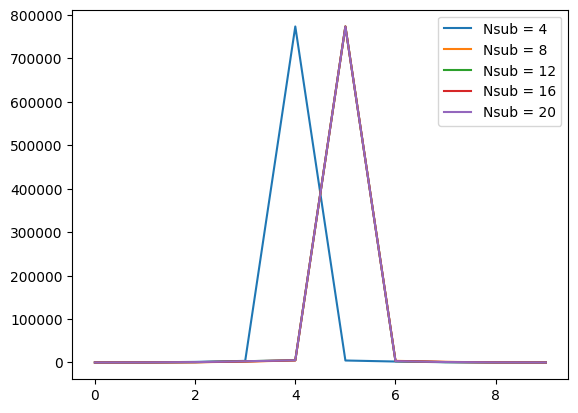

In [7]:
plt.figure()
for i, ihist in enumerate(hist_list):
    print(nsub_w[i], ihist[0])
    plt.plot(ihist[0], label=f'Nsub = {nsub_w[i]}')
plt.legend()

{'instrument': 'DB', 'npointings': 1000, 'nsub_in': 20, 'nsub_out': 4, 'nrec': 2, 'convolution_in': True, 'convolution_out': True, 'bandpass_correction': True, 'NOISE': {'ndet': 0, 'npho150': 0, 'npho220': 0, 'detector_nep': 4.7e-17}, 'SYNTHBEAM': {'synthbeam_kmax': 1}, 'dtheta': 15}


/pbs/throng/qubic/Anaconda3/envs/qubic_python38/lib/python3.8/site-packages/pysimulators-1.1.dev102-py3.8-linux-x86_64.egg/pysimulators/interfaces/healpy/operators.py:288: HealpyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
  output.T[...] = hp.smoothing(


{'instrument': 'DB', 'npointings': 1000, 'nsub_in': 20, 'nsub_out': 8, 'nrec': 2, 'convolution_in': True, 'convolution_out': True, 'bandpass_correction': True, 'NOISE': {'ndet': 0, 'npho150': 0, 'npho220': 0, 'detector_nep': 4.7e-17}, 'SYNTHBEAM': {'synthbeam_kmax': 1}, 'dtheta': 15}
{'instrument': 'DB', 'npointings': 1000, 'nsub_in': 20, 'nsub_out': 12, 'nrec': 2, 'convolution_in': True, 'convolution_out': True, 'bandpass_correction': True, 'NOISE': {'ndet': 0, 'npho150': 0, 'npho220': 0, 'detector_nep': 4.7e-17}, 'SYNTHBEAM': {'synthbeam_kmax': 1}, 'dtheta': 15}
{'instrument': 'DB', 'npointings': 1000, 'nsub_in': 20, 'nsub_out': 16, 'nrec': 2, 'convolution_in': True, 'convolution_out': True, 'bandpass_correction': True, 'NOISE': {'ndet': 0, 'npho150': 0, 'npho220': 0, 'detector_nep': 4.7e-17}, 'SYNTHBEAM': {'synthbeam_kmax': 1}, 'dtheta': 15}
{'instrument': 'DB', 'npointings': 1000, 'nsub_in': 20, 'nsub_out': 20, 'nrec': 2, 'convolution_in': True, 'convolution_out': True, 'bandpass_c

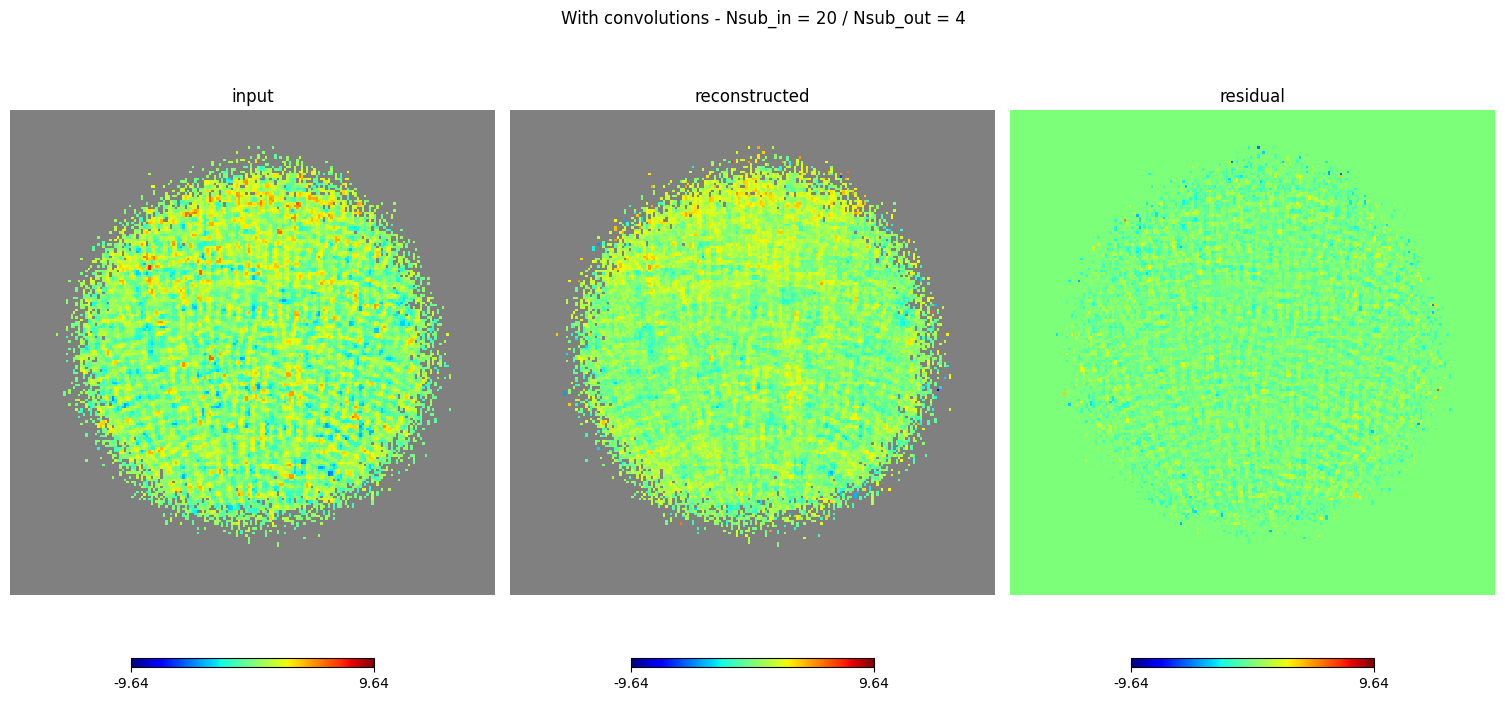

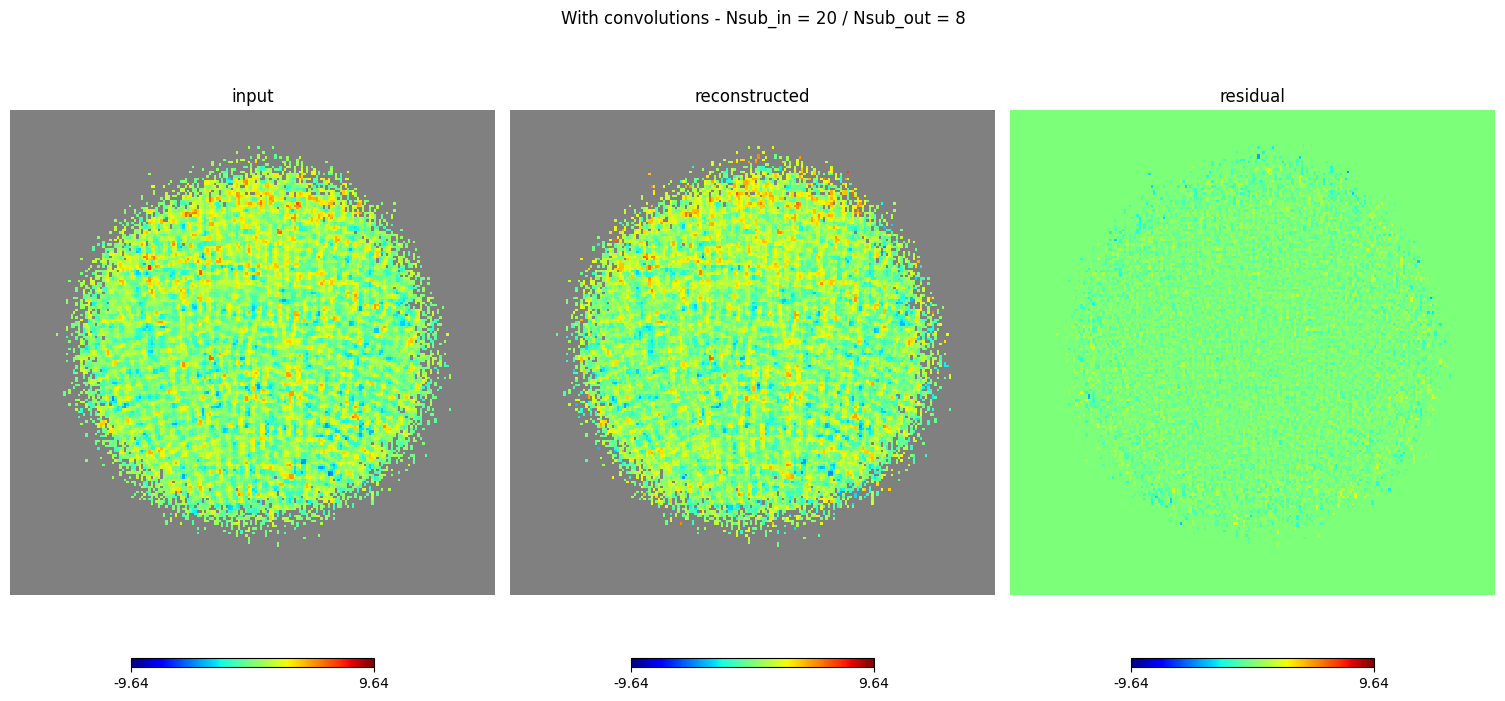

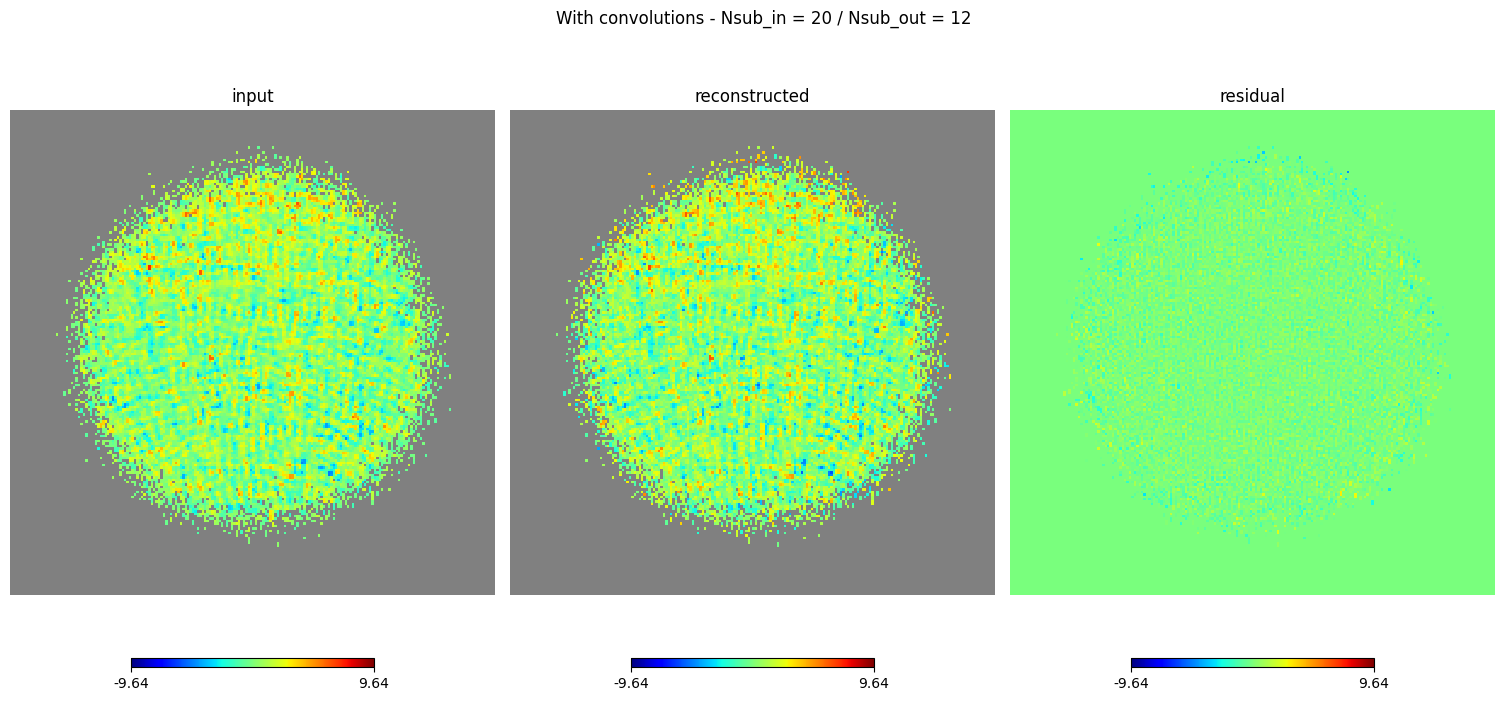

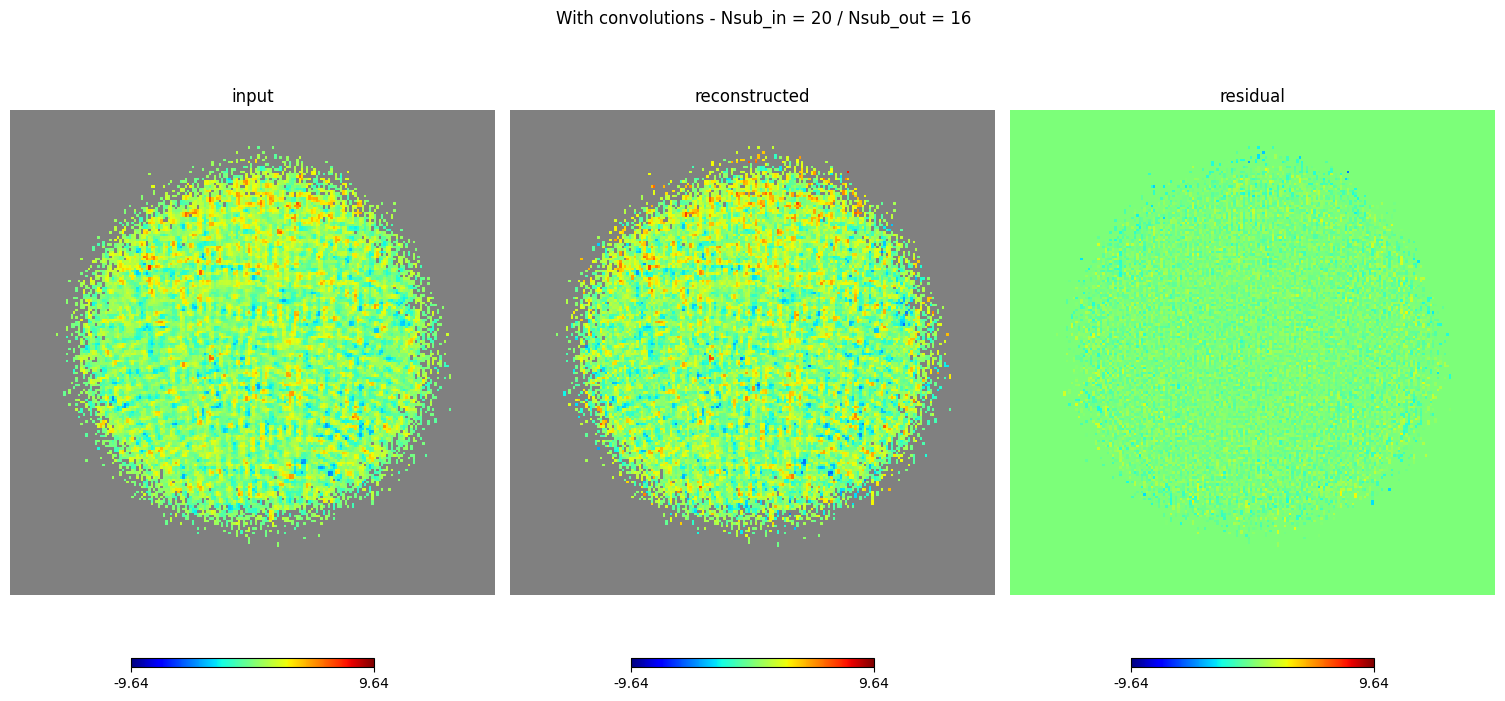

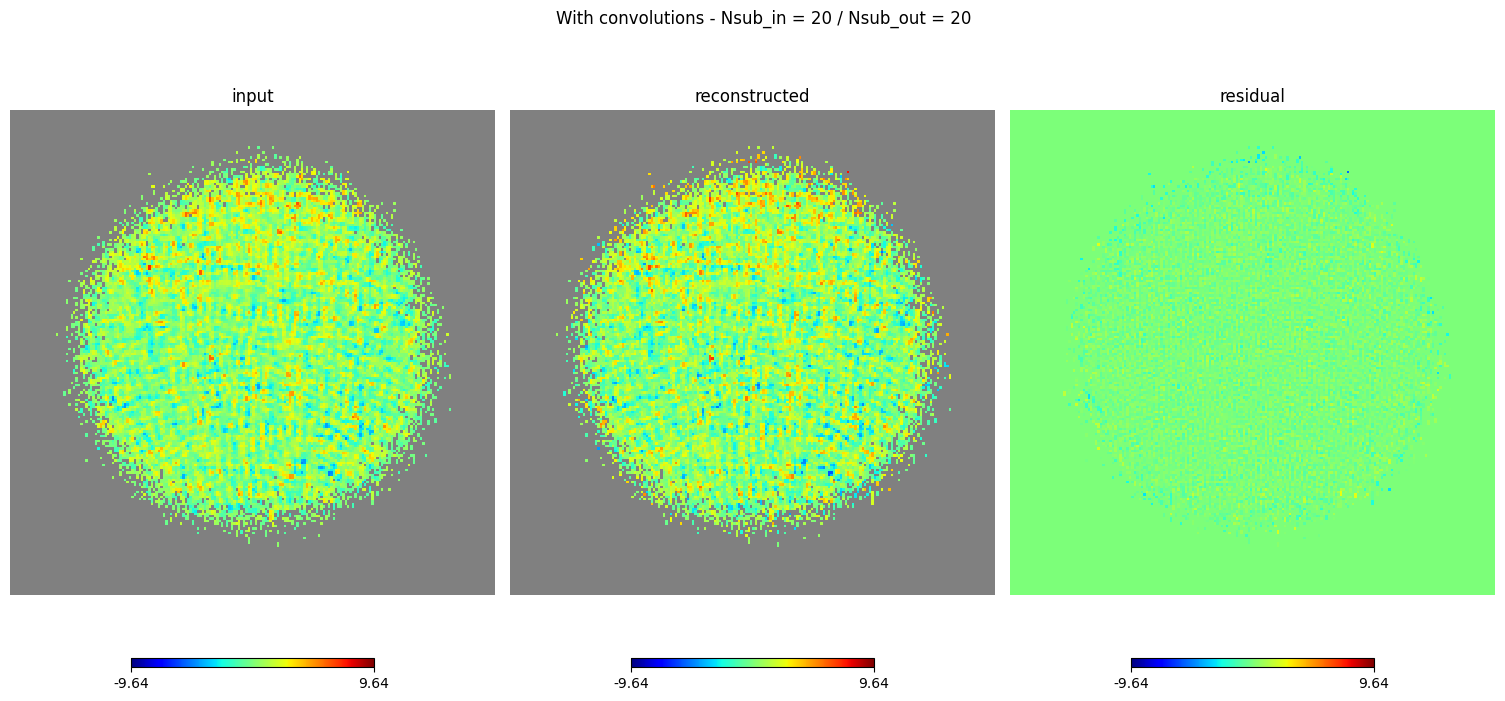

In [8]:
hist_list = []
for i in range(len(pkl_list_w)):
    plt.figure(figsize=(15,8))
    plt.axis("off")
    plt.title('With convolutions - Nsub_in = 20 / Nsub_out = ' + nsub_w[i])
    pkl_file = pkl_list_w[i]

    fwhm = pkl_file['fwhm_rec']
    C = HealpixConvolutionGaussianOperator(fwhm[ifreq], lmax=2*256)
    maps = pkl_file['maps']
    input_maps = pkl_file['maps_in']
    print(pkl_file['parameters']['QUBIC'])
    
    coverage = pkl_file['coverage']
    covnorm = coverage / coverage.max()
    seenpix = covnorm > 0.2
    
    maps[:, ~seenpix, :] = hp.UNSEEN
    input_maps[:, ~seenpix, :] = hp.UNSEEN
    residual = C*input_maps[ifreq, :, istk]-maps[ifreq, :, istk]
    
    sigma = np.max([np.std(input_maps[ifreq, seenpix, istk]), np.std(maps[ifreq, seenpix, istk])])
    n = 3
    
    hp.gnomview(C*input_maps[ifreq, :, istk],min=-n*sigma, max=n*sigma, rot=pkl_file['center'],reso=15, notext=True, cmap='jet', title='input', sub=(1, 3, 1))
    hp.gnomview(maps[ifreq, :, istk],min=-n*sigma, max=n*sigma, rot=pkl_file['center'], reso=15, notext=True, cmap='jet', title='reconstructed', sub=(1, 3, 2))
    hp.gnomview(residual,min=-n*sigma, max=n*sigma, rot=pkl_file['center'], reso=15, notext=True, cmap='jet', title='residual', sub=(1, 3, 3))

    hist_list.append(np.hstack((C*input_maps[ifreq, :, istk]-maps[ifreq, :, istk])[seenpix]))

4 -0.9280432219985273
8 -2.680570105507986
12 -1.7855608520688637
16 -1.474087366869219
20 -1.5251973755826131


Text(0.5, 1.0, 'With convolutions - Nsub_in = 20')

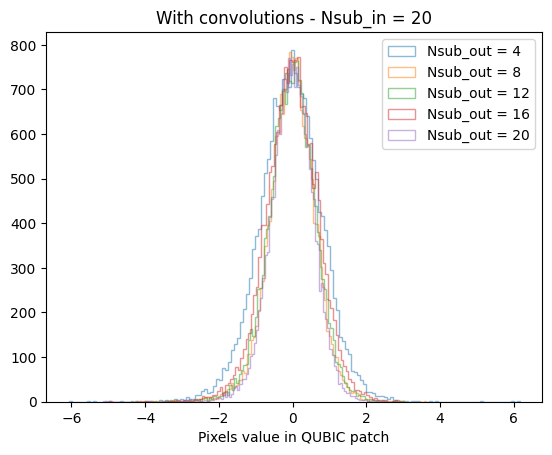

In [9]:
plt.figure()
for i, ihist in enumerate(hist_list):
    print(nsub_w[i], ihist[0])
    plt.hist(ihist, bins='auto',histtype='step',label=f'Nsub_out = {nsub_w[i]}', alpha=0.5)
plt.legend()
plt.xlabel('Pixels value in QUBIC patch')
plt.title('With convolutions - Nsub_in = 20')

{'instrument': 'DB', 'npointings': 1000, 'nsub_in': 20, 'nsub_out': 4, 'nrec': 2, 'convolution_in': True, 'convolution_out': False, 'bandpass_correction': True, 'NOISE': {'ndet': 0, 'npho150': 0, 'npho220': 0, 'detector_nep': 4.7e-17}, 'SYNTHBEAM': {'synthbeam_kmax': 1}, 'dtheta': 15}
{'instrument': 'DB', 'npointings': 1000, 'nsub_in': 20, 'nsub_out': 8, 'nrec': 2, 'convolution_in': True, 'convolution_out': False, 'bandpass_correction': True, 'NOISE': {'ndet': 0, 'npho150': 0, 'npho220': 0, 'detector_nep': 4.7e-17}, 'SYNTHBEAM': {'synthbeam_kmax': 1}, 'dtheta': 15}
{'instrument': 'DB', 'npointings': 1000, 'nsub_in': 20, 'nsub_out': 12, 'nrec': 2, 'convolution_in': True, 'convolution_out': False, 'bandpass_correction': True, 'NOISE': {'ndet': 0, 'npho150': 0, 'npho220': 0, 'detector_nep': 4.7e-17}, 'SYNTHBEAM': {'synthbeam_kmax': 1}, 'dtheta': 15}
{'instrument': 'DB', 'npointings': 1000, 'nsub_in': 20, 'nsub_out': 16, 'nrec': 2, 'convolution_in': True, 'convolution_out': False, 'bandpas

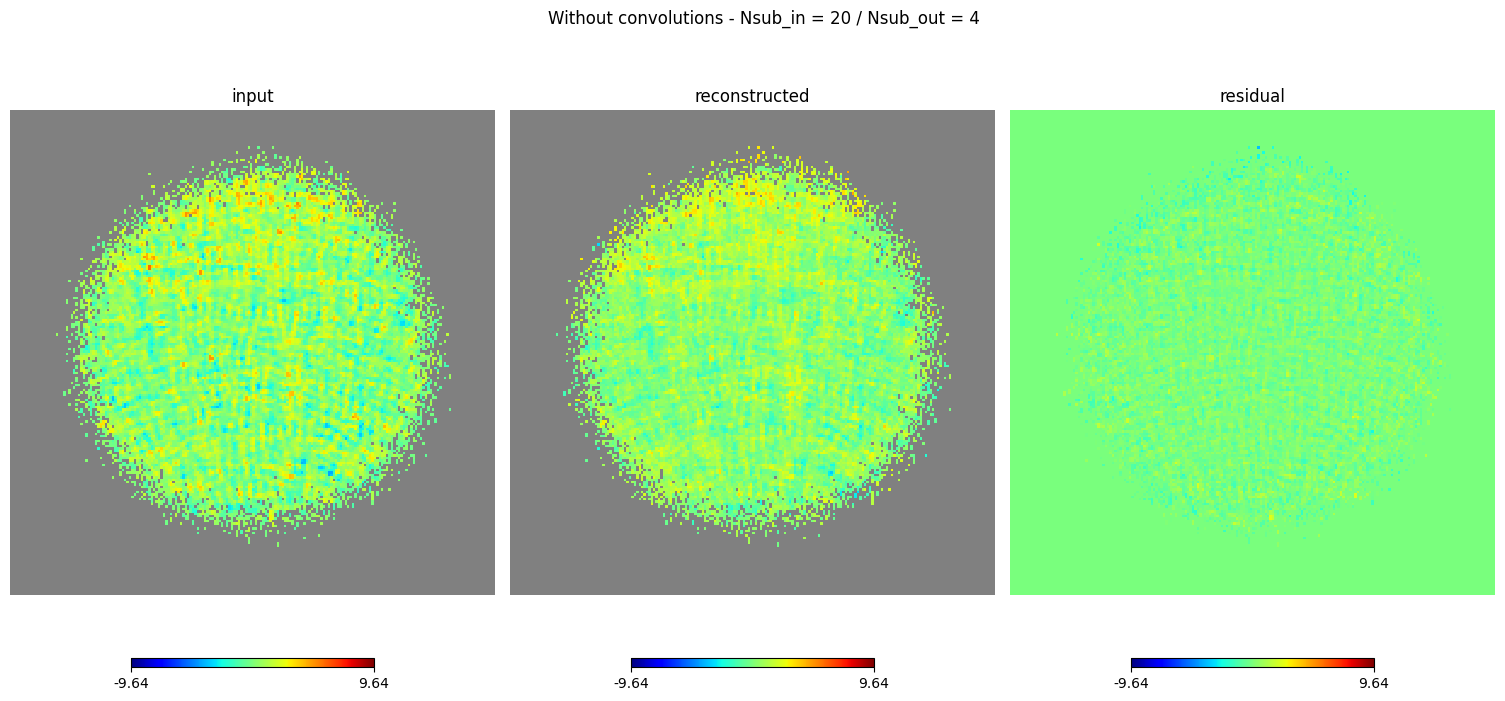

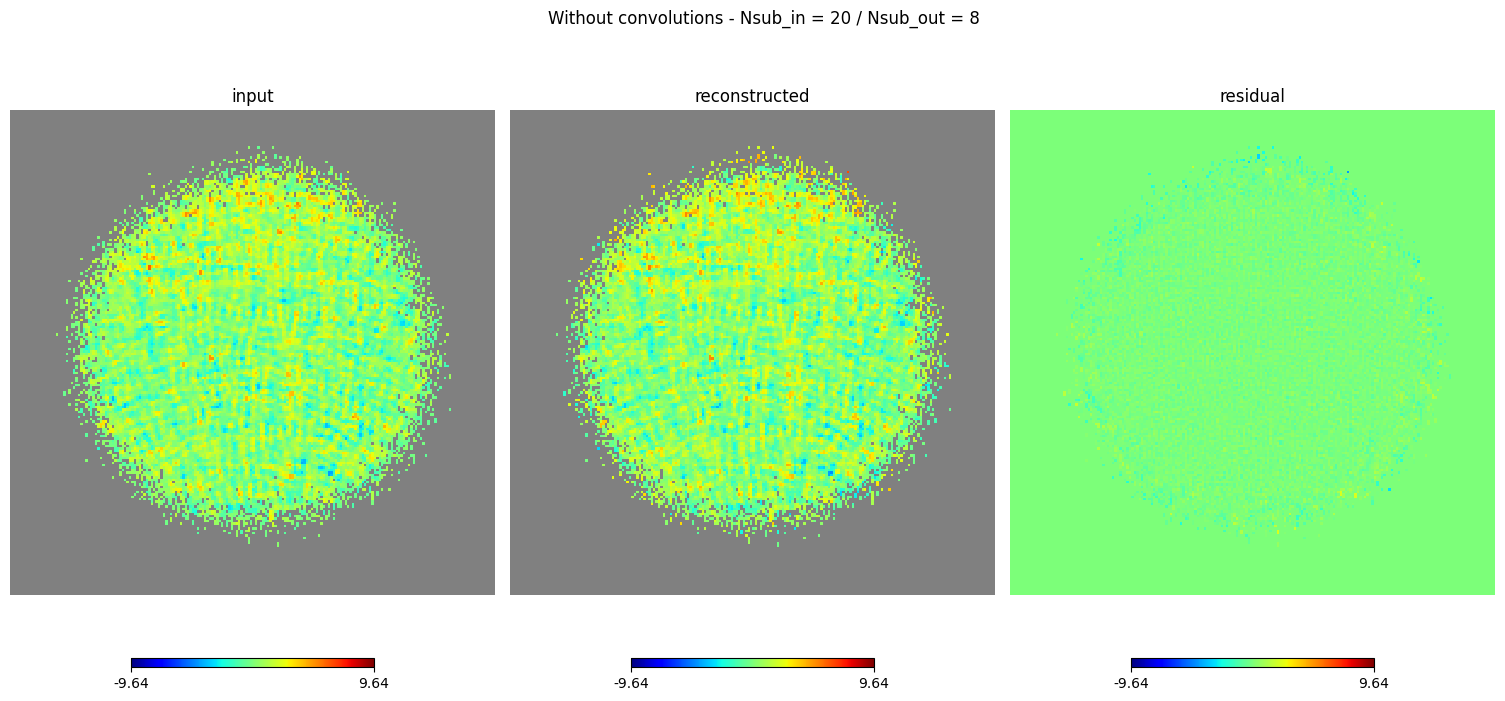

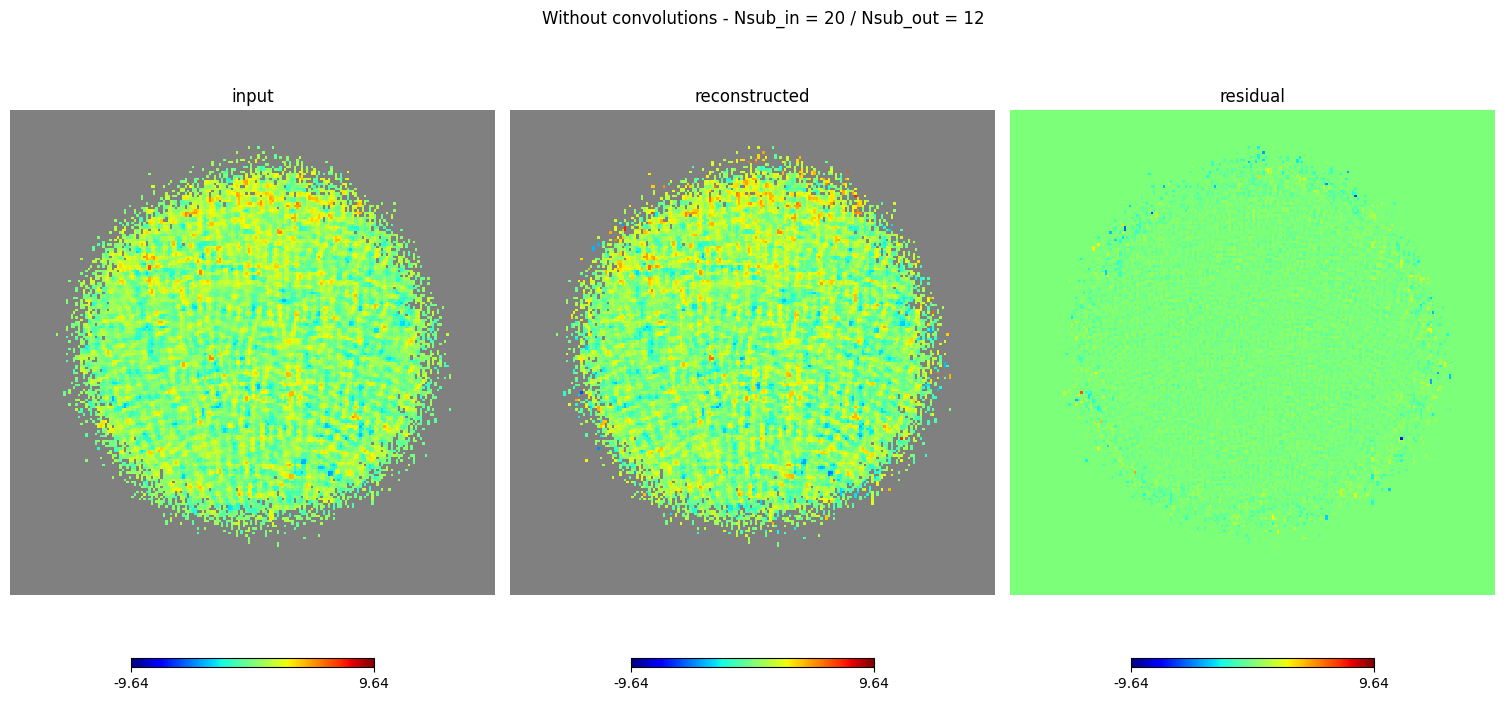

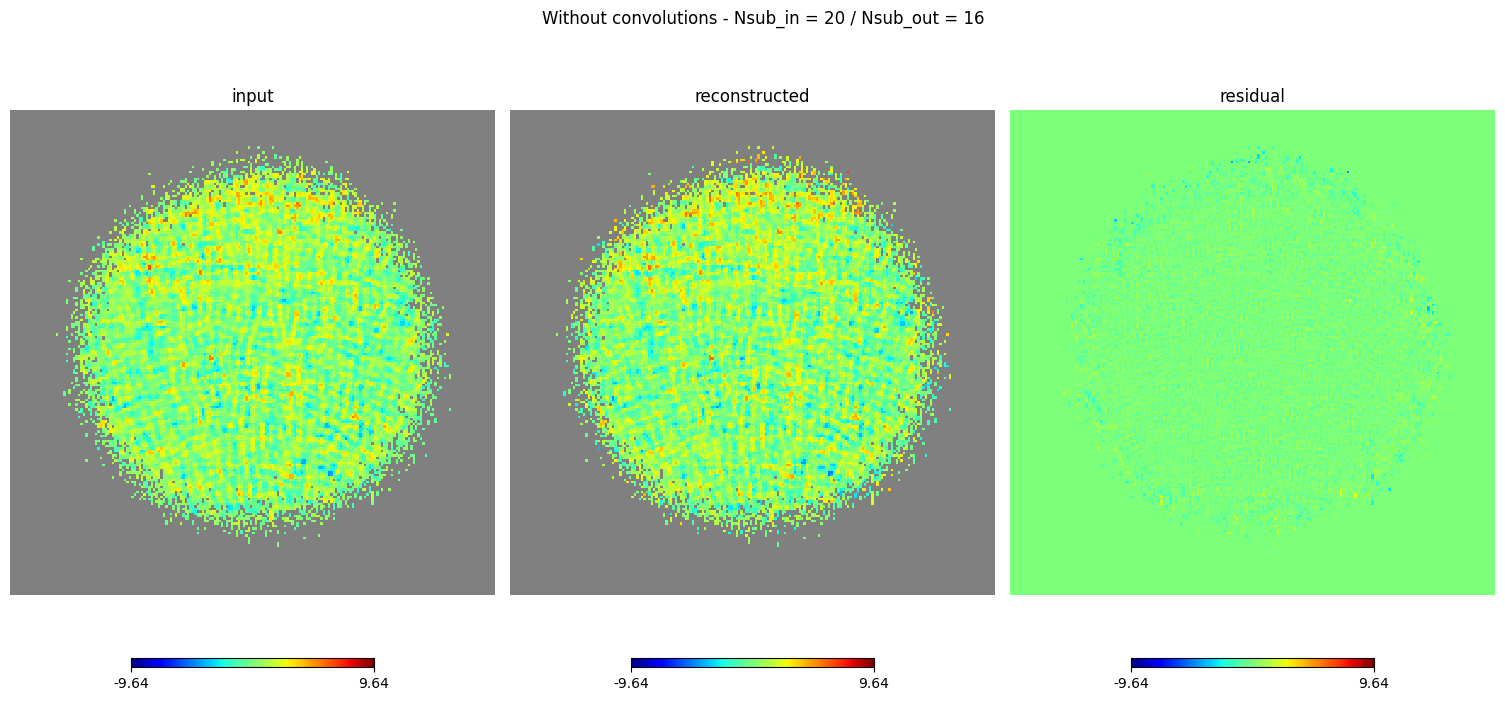

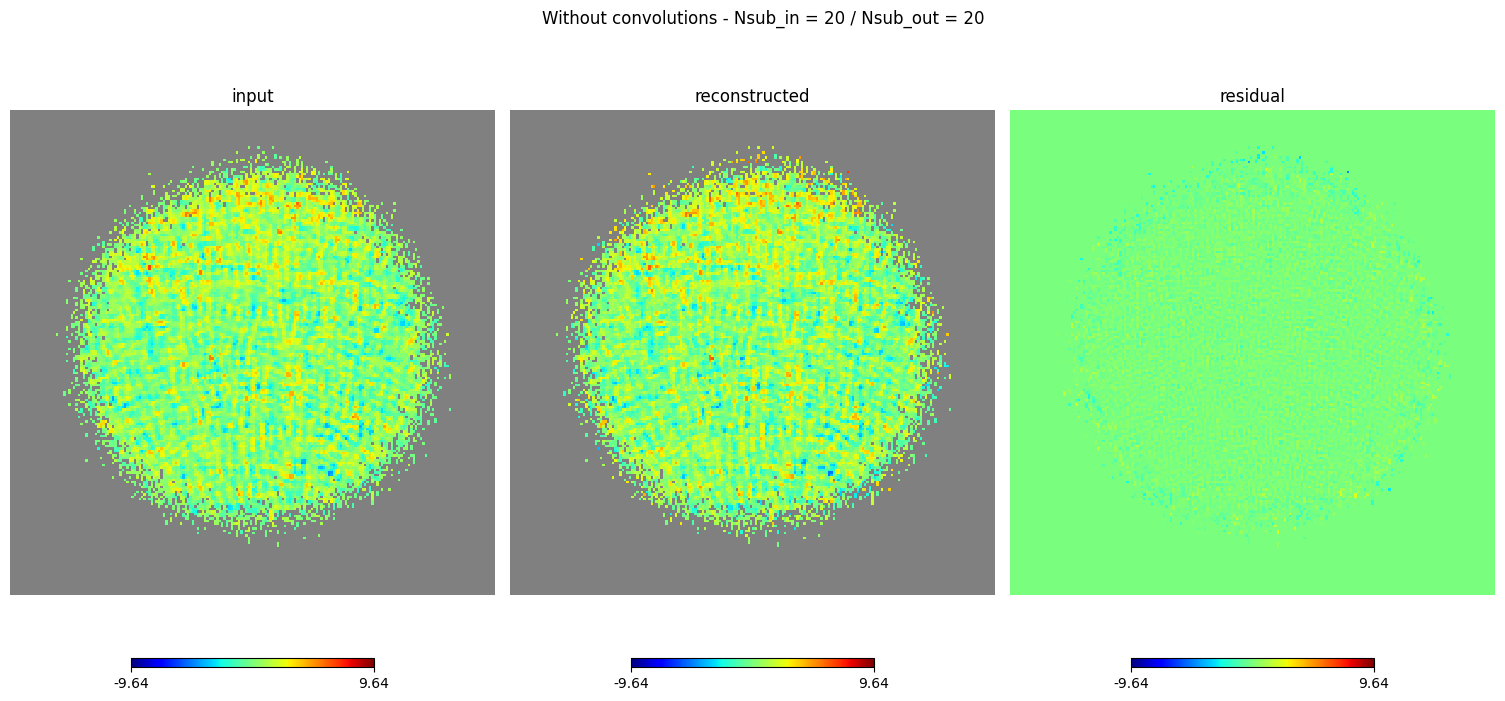

In [10]:
for i in range(len(pkl_list_w)):
    plt.figure(figsize=(15,8))
    plt.axis("off")
    plt.title('Without convolutions - Nsub_in = 20 / Nsub_out = ' + nsub_wo[i])
    pkl_file = pkl_list_wo[i]

    fwhm = pkl_file['fwhm_rec']
    C = HealpixConvolutionGaussianOperator(fwhm[ifreq], lmax=2*256)
    maps = pkl_file['maps']
    input_maps = pkl_file['maps_in']
    print(pkl_file['parameters']['QUBIC'])
    
    coverage = pkl_file['coverage']
    covnorm = coverage / coverage.max()
    seenpix = covnorm > 0.2
    
    maps[:, ~seenpix, :] = hp.UNSEEN
    input_maps[:, ~seenpix, :] = hp.UNSEEN
    
    sigma = np.max([np.std(input_maps[ifreq, seenpix, istk]), np.std(maps[ifreq, seenpix, istk])])
    n = 3
    
    hp.gnomview(C*input_maps[ifreq, :, istk],min=-n*sigma, max=n*sigma, rot=pkl_file['center'],reso=15, notext=True, cmap='jet', title='input', sub=(1, 3, 1))
    hp.gnomview(maps[ifreq, :, istk],min=-n*sigma, max=n*sigma, rot=pkl_file['center'], reso=15, notext=True, cmap='jet', title='reconstructed', sub=(1, 3, 2))
    hp.gnomview(C*input_maps[ifreq, :, istk]-maps[ifreq, :, istk],min=-n*sigma, max=n*sigma, rot=pkl_file['center'], reso=15, notext=True, cmap='jet', title='residual', sub=(1, 3, 3))


4 -0.9280432219985273
8 -2.680570105507986
12 -1.7855608520688637
16 -1.474087366869219
20 -1.5251973755826131


Text(0.5, 1.0, 'Without convolutions - Nsub_in = 20')

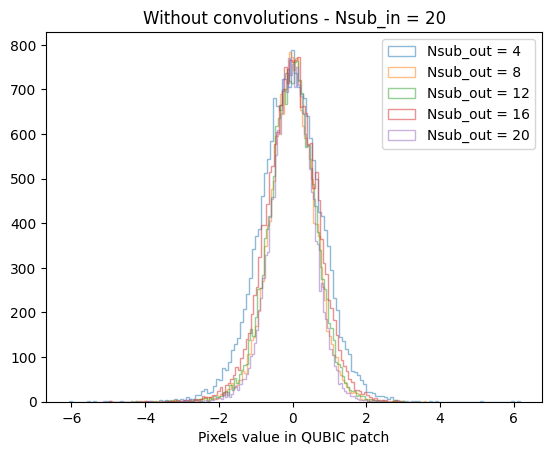

In [11]:
plt.figure()
for i, ihist in enumerate(hist_list):
    print(nsub_wo[i], ihist[0])
    plt.hist(ihist, bins='auto',histtype='step',label=f'Nsub_out = {nsub_wo[i]}', alpha=0.5)
plt.legend()
plt.xlabel('Pixels value in QUBIC patch')
plt.title('Without convolutions - Nsub_in = 20')

In [12]:
pkl_list = []
nsub = ['4', '8', '12', '16', '20']
for i in nsub:
    path = glob.glob(f'/pbs/home/t/tlaclave/sps/FMM_data/test/maps/noiseless_wo_convolutions_nsub_in=20_out={i}_pla*')[0]
    pkl_ = pkl.load(open(path, 'rb'))
    pkl_list.append(pkl_)

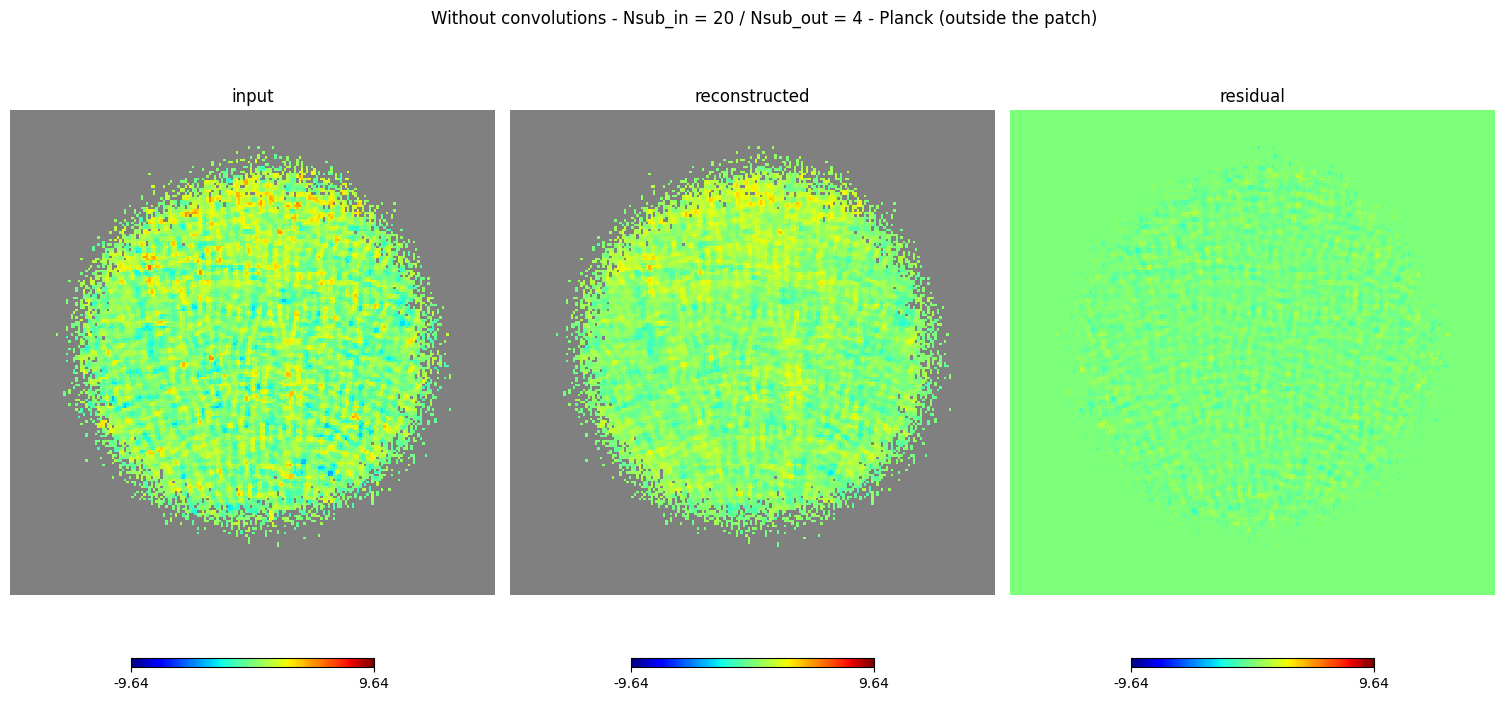

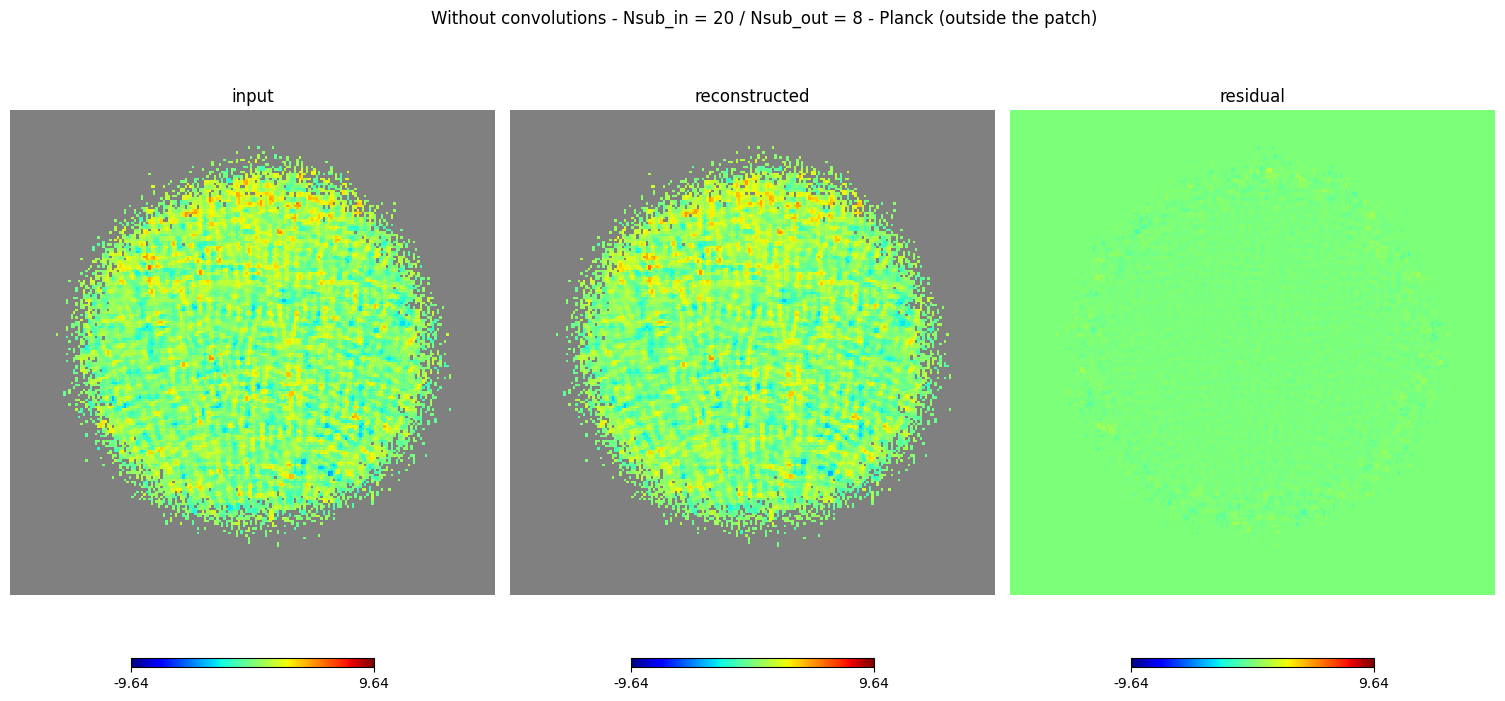

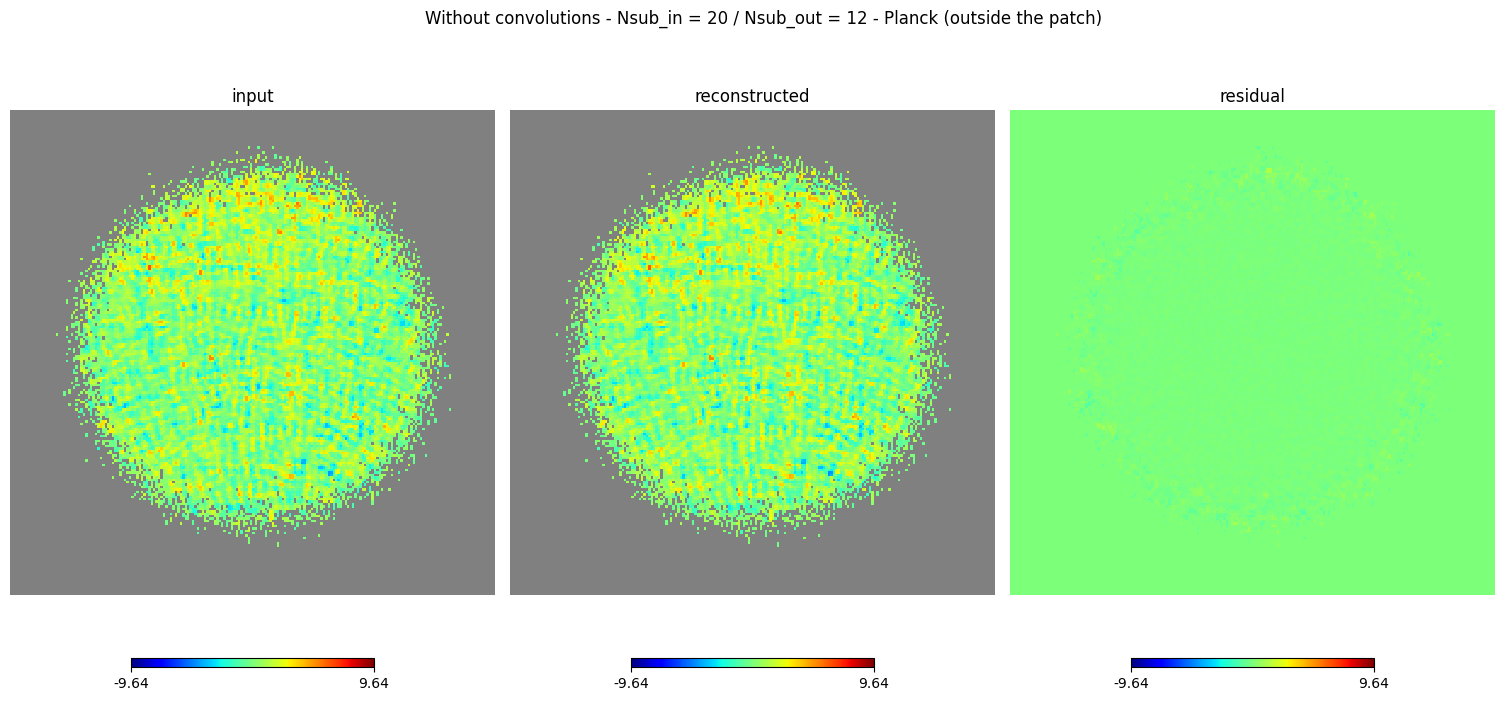

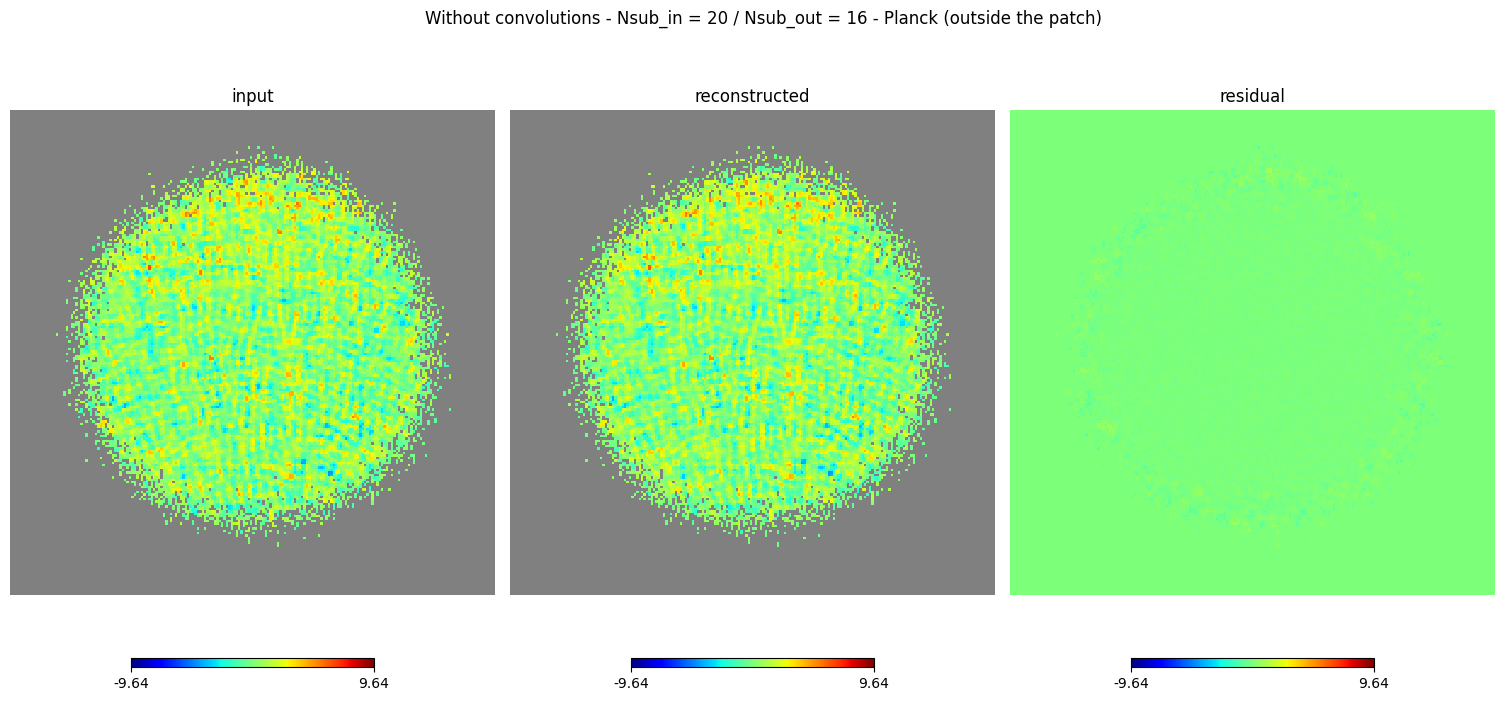

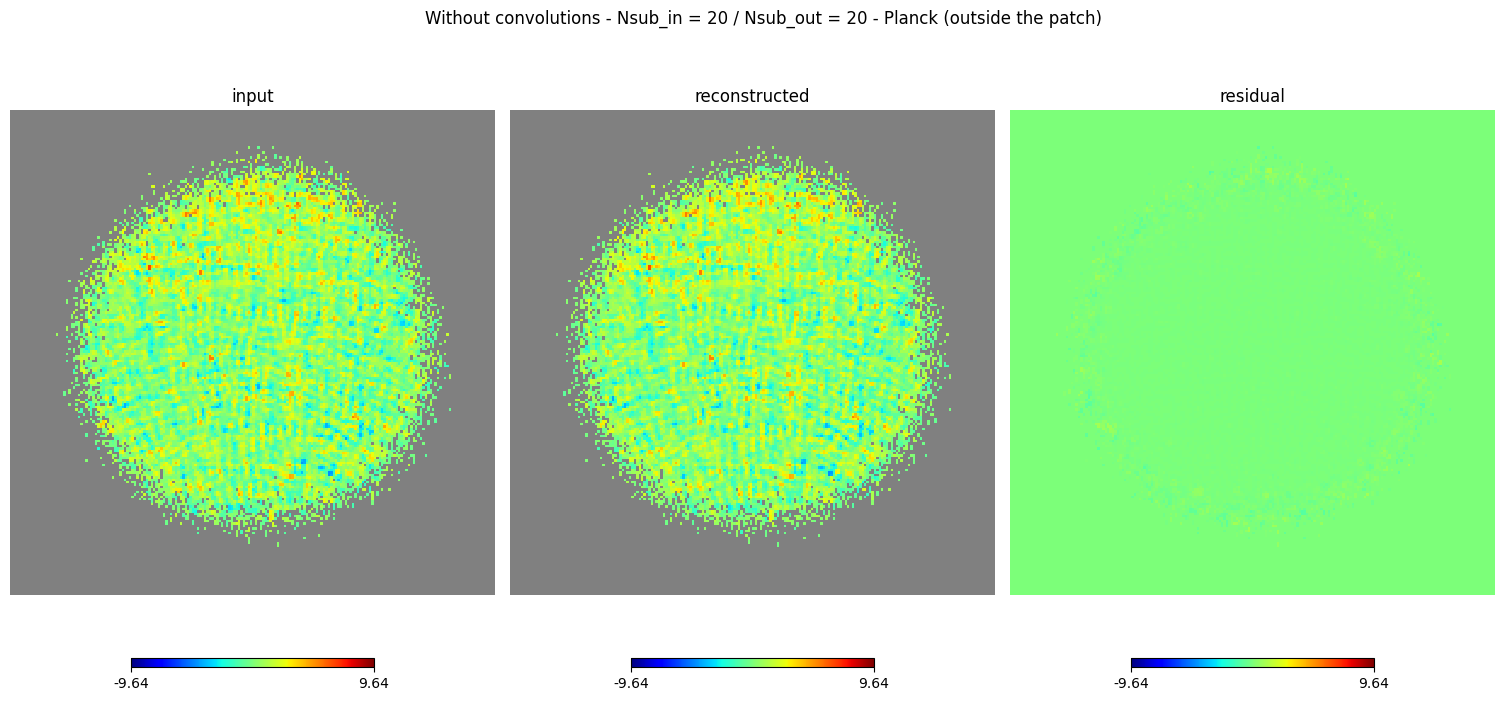

In [13]:
hist_list = []
for i in range(len(pkl_list)):
    plt.figure(figsize=(15,8))
    plt.axis("off")
    plt.title('Without convolutions - Nsub_in = 20 / Nsub_out = ' + nsub[i] + ' - Planck (outside the patch)')
    pkl_file = pkl_list[i]

    fwhm = pkl_file['fwhm_rec']
    C = HealpixConvolutionGaussianOperator(fwhm[ifreq], lmax=2*256)
    C_test = HealpixConvolutionGaussianOperator(0.001, lmax=512)
    
    maps = pkl_file['maps']
    input_maps = pkl_file['maps_in']
    
    coverage = pkl_file['coverage']
    covnorm = coverage / coverage.max()
    seenpix = covnorm > 0.2
    
    maps[:, ~seenpix, :] = hp.UNSEEN
    input_maps[:, ~seenpix, :] = hp.UNSEEN
    residual = C*input_maps[ifreq, :, istk]-C_test*maps[ifreq, :, istk]
    
    sigma = np.max([np.std(input_maps[ifreq, seenpix, istk]), np.std(maps[ifreq, seenpix, istk])])
    n = 3
    
    hp.gnomview(C*input_maps[ifreq, :, istk],min=-n*sigma, max=n*sigma, rot=pkl_file['center'],reso=15, notext=True, cmap='jet', title='input', sub=(1, 3, 1))
    hp.gnomview(C_test*maps[ifreq, :, istk],min=-n*sigma, max=n*sigma, rot=pkl_file['center'], reso=15, notext=True, cmap='jet', title='reconstructed', sub=(1, 3, 2))
    hp.gnomview(residual,min=-n*sigma, max=n*sigma, rot=pkl_file['center'], reso=15, notext=True, cmap='jet', title='residual', sub=(1, 3, 3))

    hist_list.append(np.hstack((residual)[seenpix]))

4 -0.6216847408570907
8 -0.75634426021016
12 -0.568899416554495
16 -0.42984672357272113
20 -0.46371013566031305


Text(0.5, 1.0, 'Without convolutions - Nsub_in = 20 - With Planck (outside the patch)')

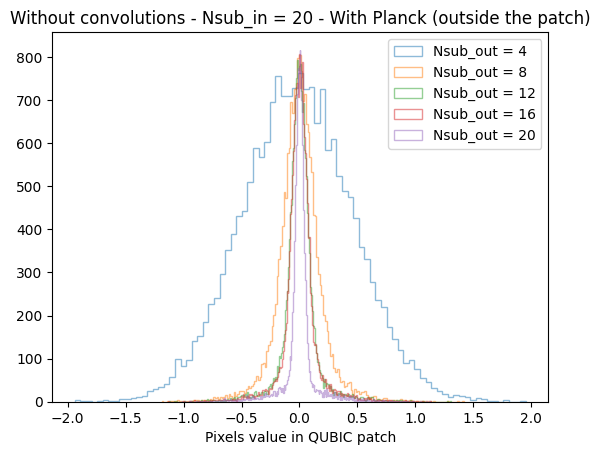

In [14]:
plt.figure()
for i, ihist in enumerate(hist_list):
    print(nsub[i], ihist[0])
    plt.hist(ihist, bins='auto',histtype='step',label=f'Nsub_out = {nsub[i]}', alpha=0.5)
plt.legend()
plt.xlabel('Pixels value in QUBIC patch')
plt.title('Without convolutions - Nsub_in = 20 - With Planck (outside the patch)')

In [33]:
pkl_list = []
nsub = ['4', '8', '12', '16', '20']
for i in nsub:
    path = glob.glob(f'/pbs/home/t/tlaclave/sps/FMM_data/test/maps/CMB_noiseless_wo_convolutions_nsub_in=20_out={i}*')[0]
    pkl_ = pkl.load(open(path, 'rb'))
    pkl_list.append(pkl_)

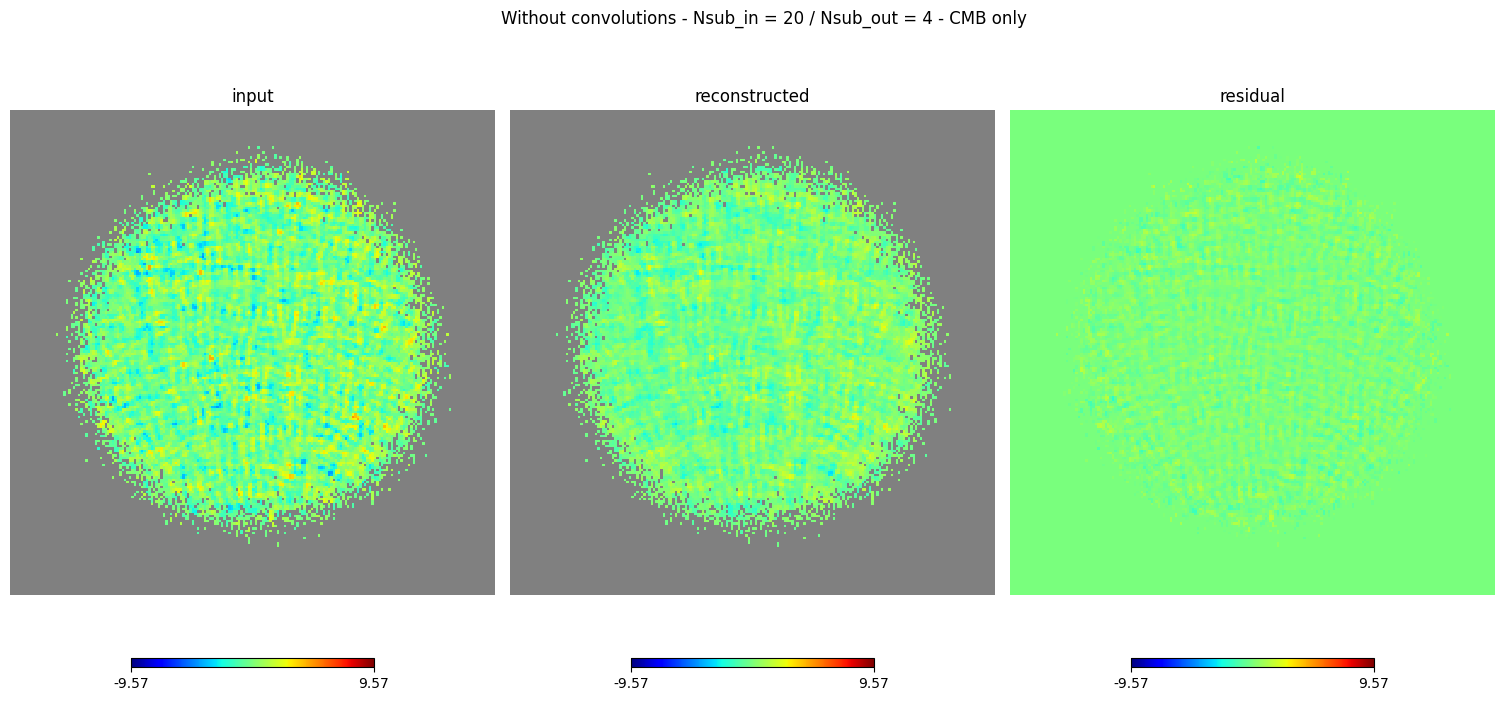

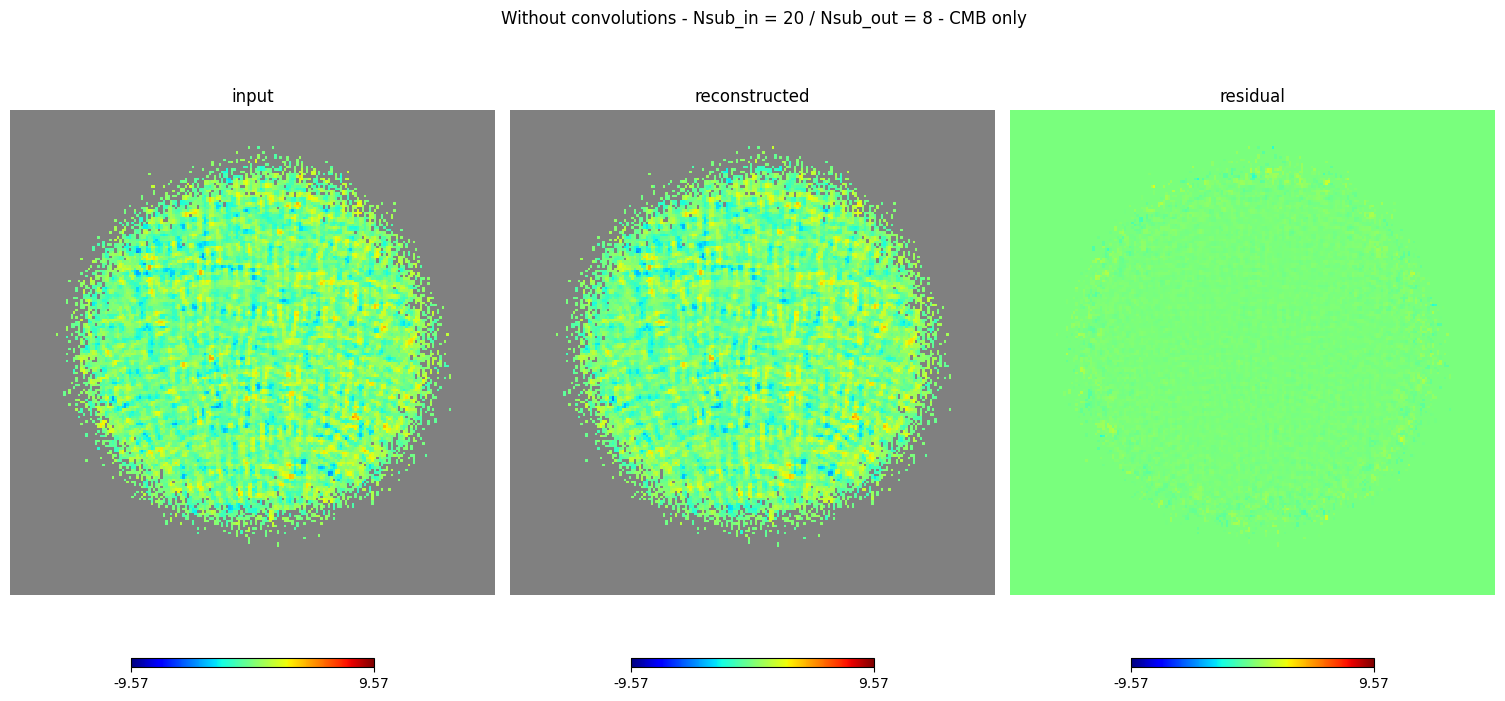

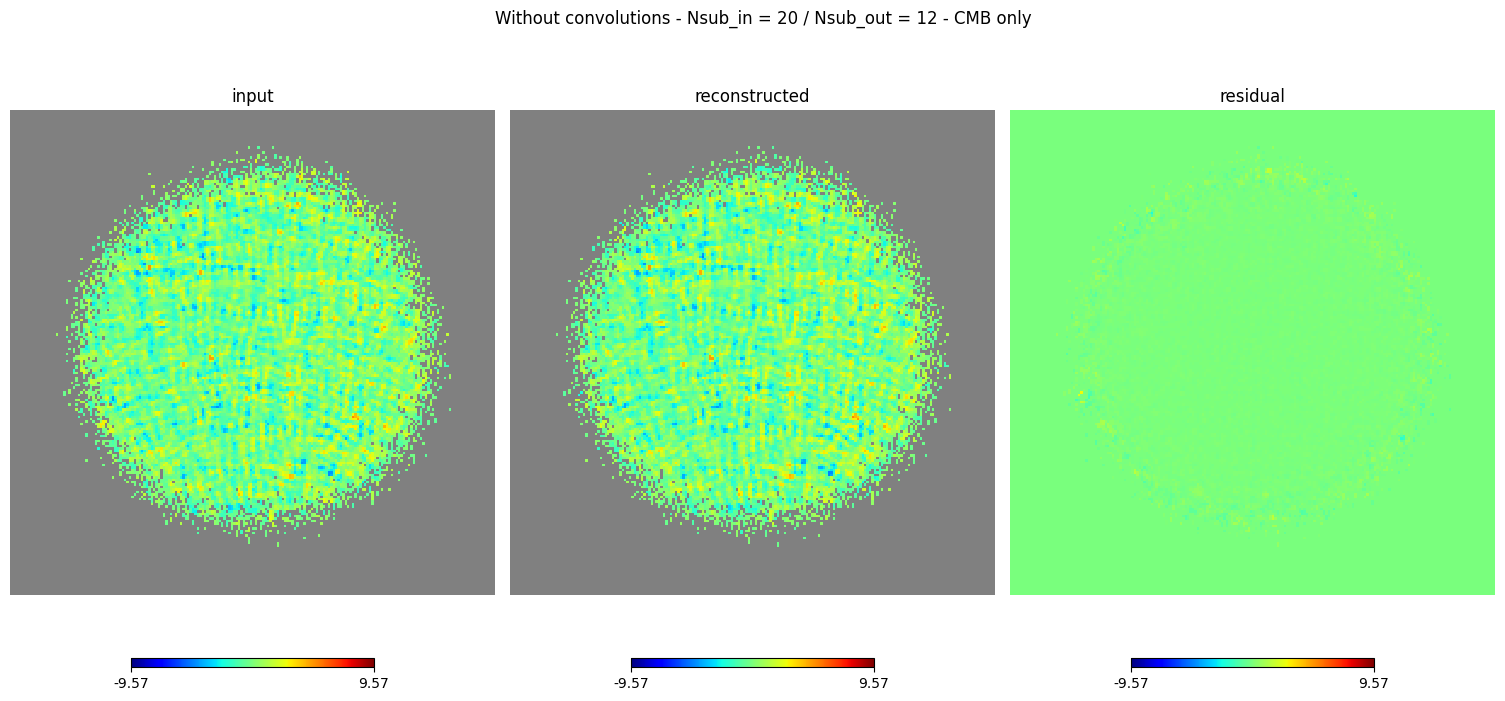

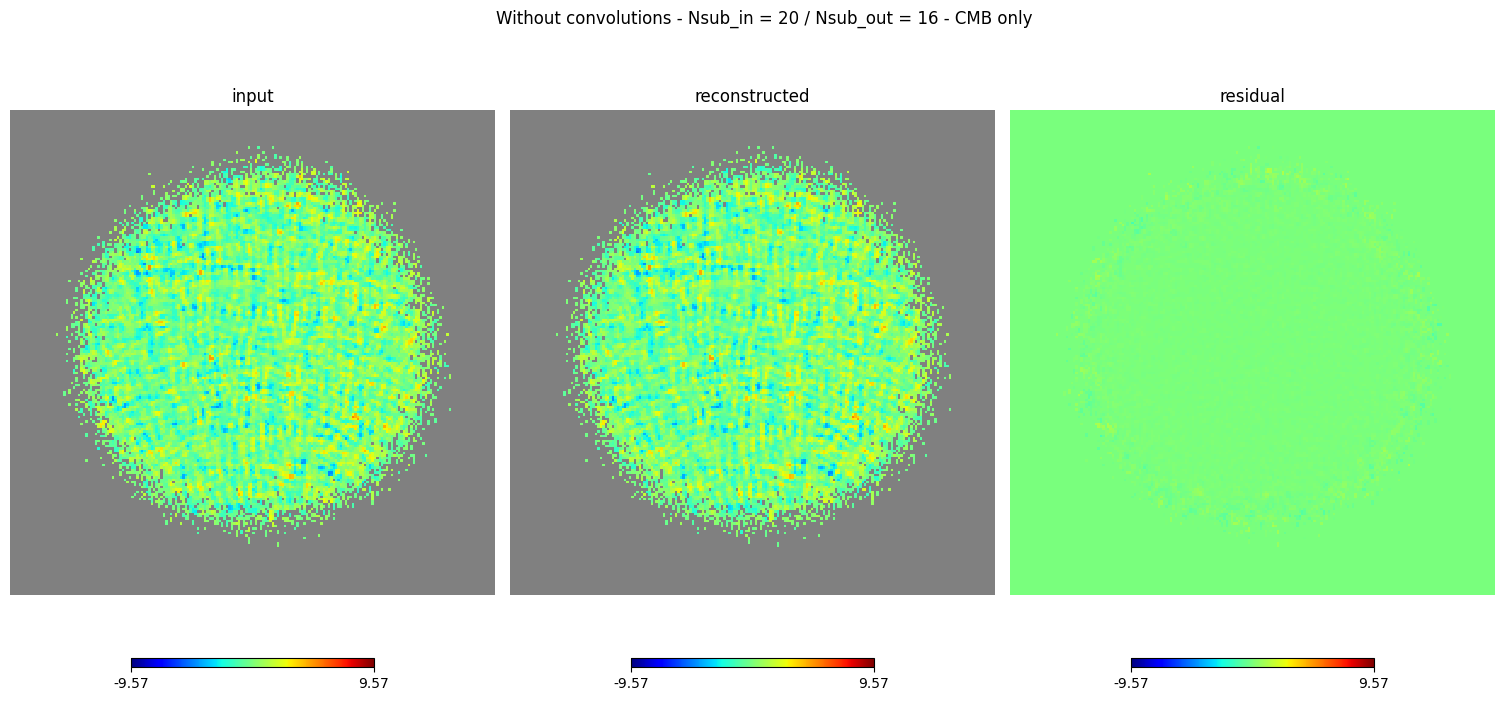

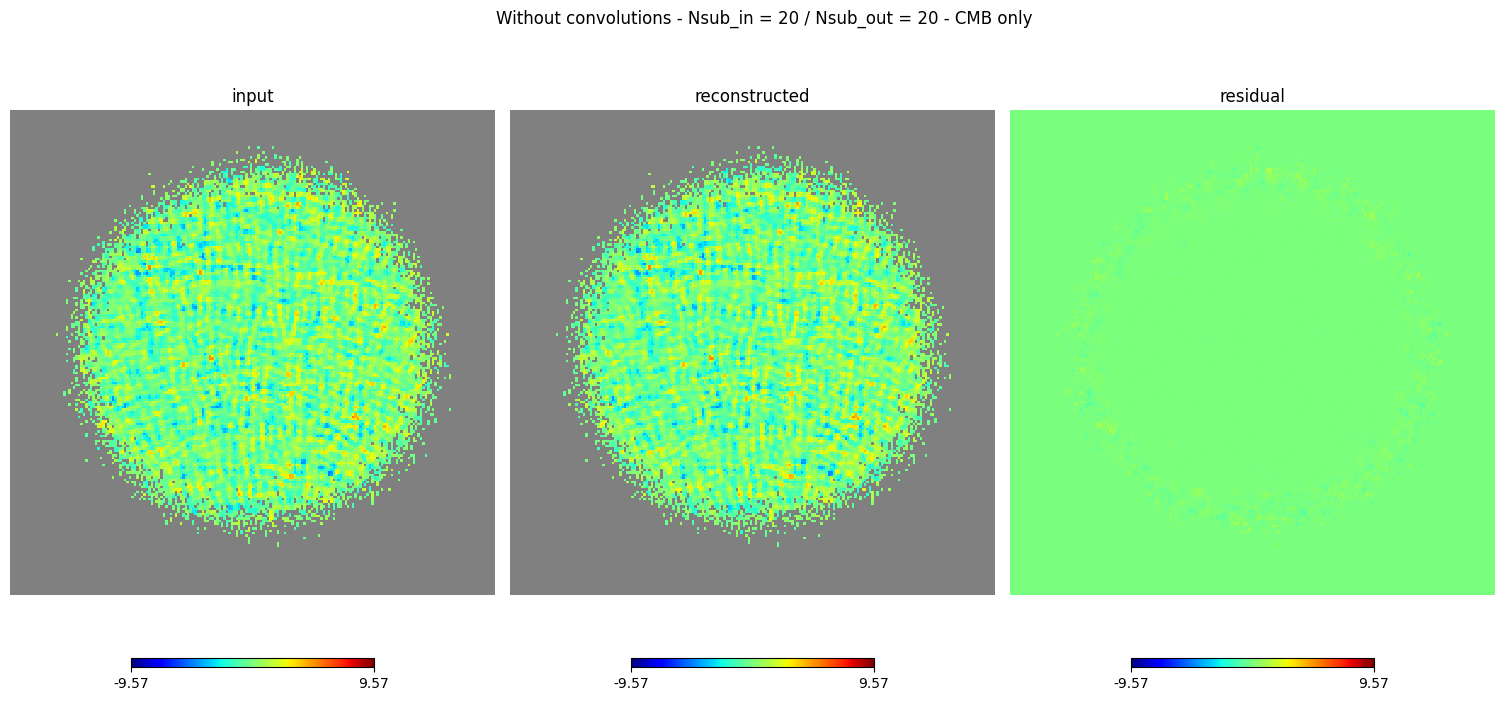

In [36]:
hist_list = []
for i in range(len(pkl_list)):
    plt.figure(figsize=(15,8))
    plt.axis("off")
    plt.title('Without convolutions - Nsub_in = 20 / Nsub_out = ' + nsub[i] + ' - CMB only')
    pkl_file = pkl_list[i]

    fwhm = pkl_file['fwhm_rec']
    C = HealpixConvolutionGaussianOperator(fwhm[ifreq], lmax=2*256)
    C_test = HealpixConvolutionGaussianOperator(0.001, lmax=512)
    
    maps = pkl_file['maps']
    input_maps = pkl_file['maps_in']
    
    coverage = pkl_file['coverage']
    covnorm = coverage / coverage.max()
    seenpix = covnorm > 0.2
    
    maps[:, ~seenpix, :] = hp.UNSEEN
    input_maps[:, ~seenpix, :] = hp.UNSEEN
    residual = C*input_maps[ifreq, :, istk]-C_test*maps[ifreq, :, istk]
    
    sigma = np.max([np.std(input_maps[ifreq, seenpix, istk]), np.std(maps[ifreq, seenpix, istk])])
    n = 3
    
    hp.gnomview(C*input_maps[ifreq, :, istk],min=-n*sigma, max=n*sigma, rot=pkl_file['center'],reso=15, notext=True, cmap='jet', title='input', sub=(1, 3, 1))
    hp.gnomview(C_test*maps[ifreq, :, istk],min=-n*sigma, max=n*sigma, rot=pkl_file['center'], reso=15, notext=True, cmap='jet', title='reconstructed', sub=(1, 3, 2))
    hp.gnomview(residual,min=-n*sigma, max=n*sigma, rot=pkl_file['center'], reso=15, notext=True, cmap='jet', title='residual', sub=(1, 3, 3))

    hist_list.append(np.hstack((residual)[seenpix]))

4 -0.2256551710745237
8 -1.9768157146459868
12 0.6452598882446985
16 0.041753399356091514
20 -0.14216610645386174


Text(0.5, 1.0, 'Without convolutions - Nsub_in = 20 - CMB only')

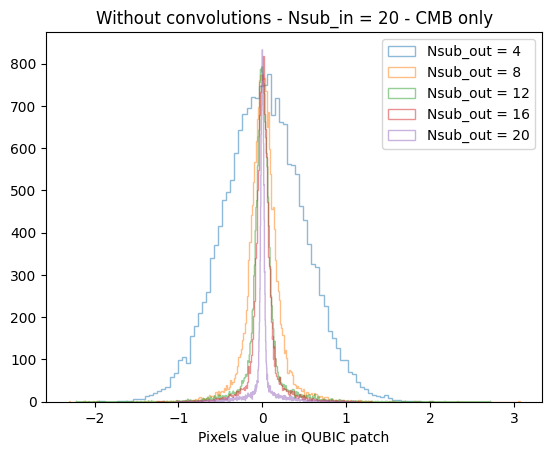

In [37]:
plt.figure()
for i, ihist in enumerate(hist_list):
    print(nsub[i], ihist[0])
    plt.hist(ihist, bins='auto',histtype='step',label=f'Nsub_out = {nsub[i]}', alpha=0.5)
plt.legend()
plt.xlabel('Pixels value in QUBIC patch')
plt.title('Without convolutions - Nsub_in = 20 - CMB only')

In [32]:
pkl_list_ = []
nsub_ = ['10', '20', '30', '35']
for i in nsub_:
    path = glob.glob(f'/pbs/home/t/tlaclave/sps/FMM_data/test/maps/noiseless_w_convolutions_nsub_in=40_out={i}*')[0]
    pkl_ = pkl.load(open(path, 'rb'))
    pkl_list_.append(pkl_)

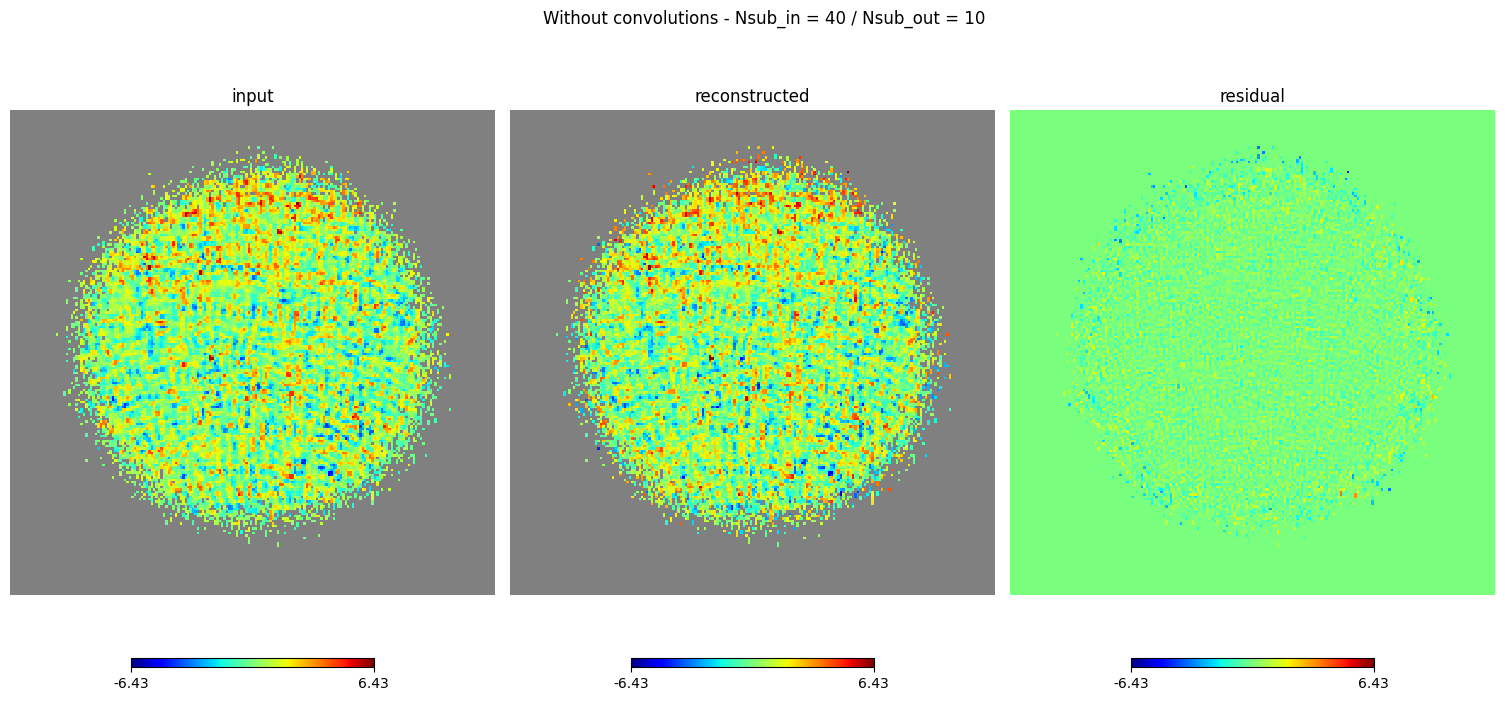

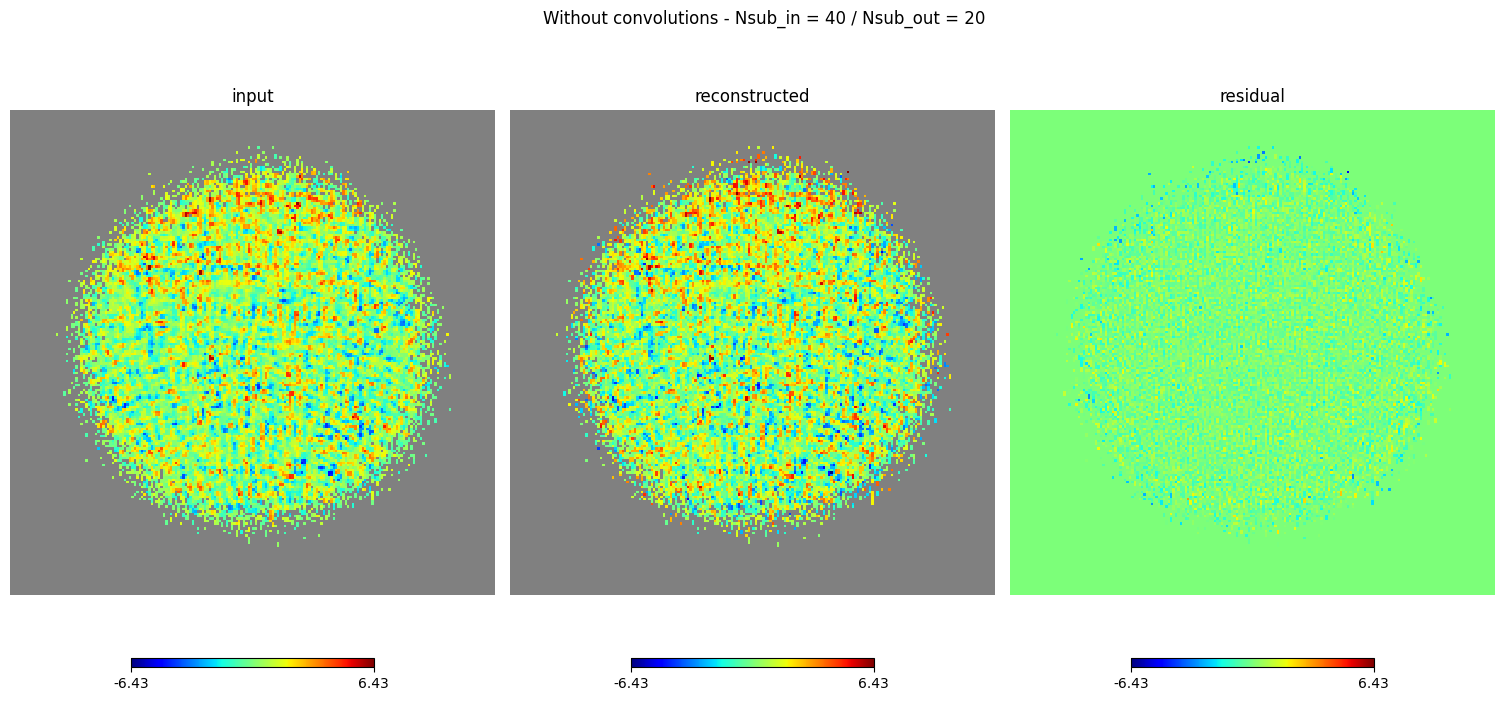

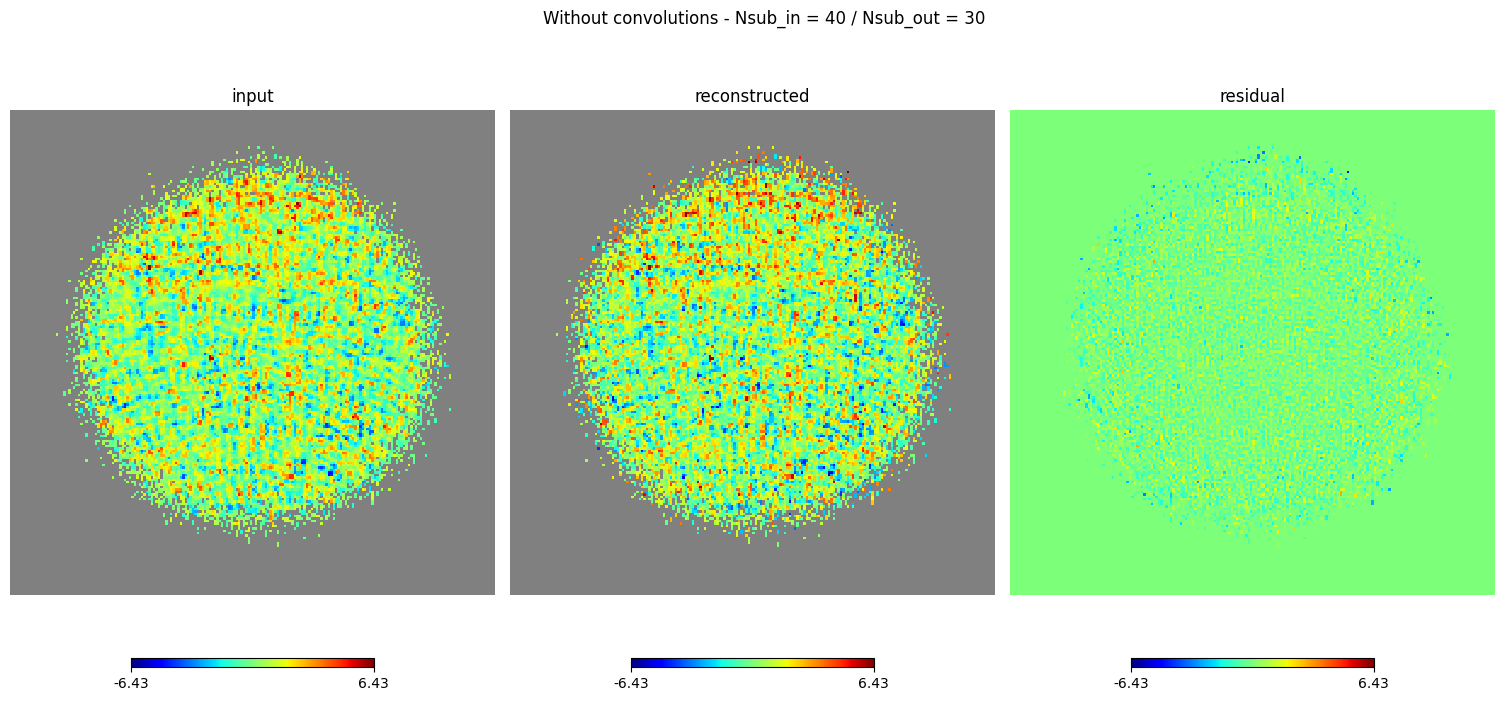

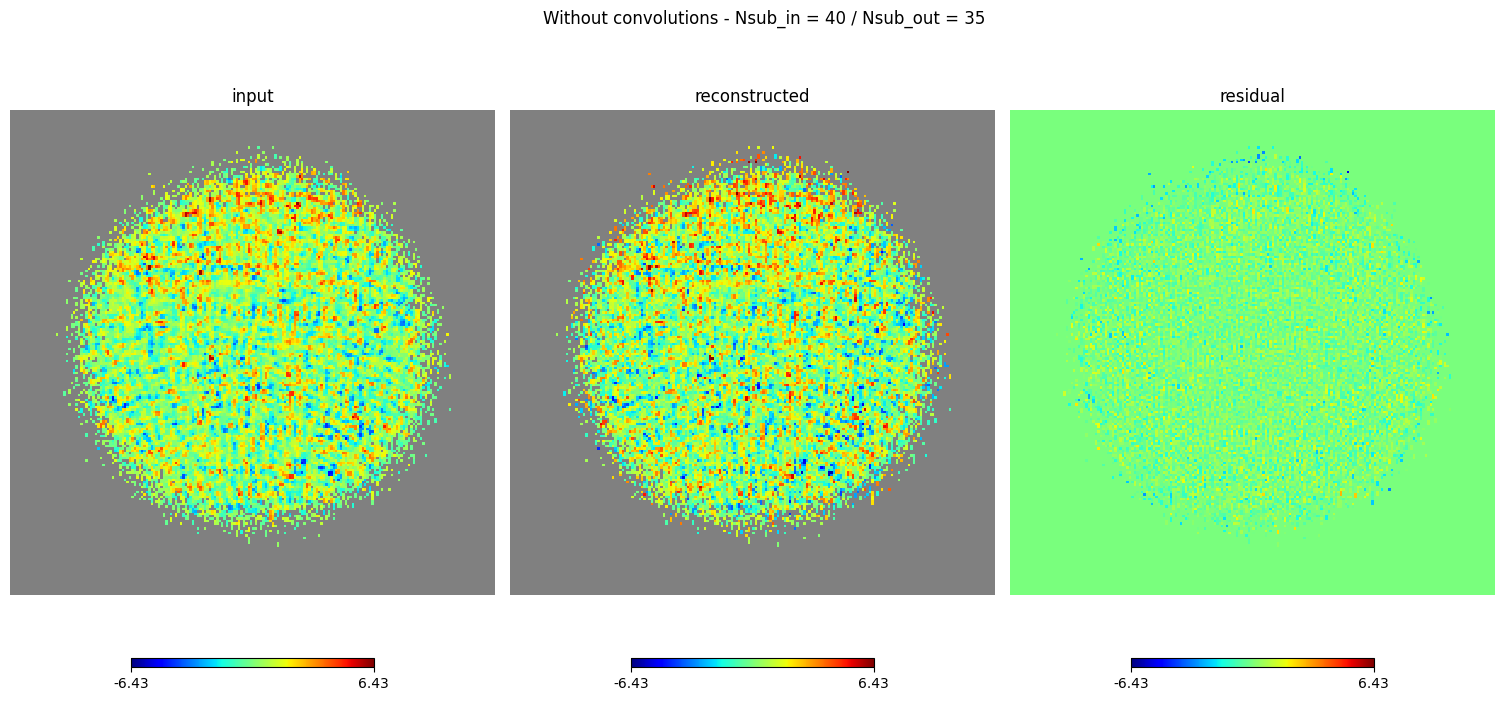

In [16]:
hist_list = []
for i in range(len(pkl_list_)):
    plt.figure(figsize=(15,8))
    plt.axis("off")
    plt.title('Without convolutions - Nsub_in = 40 / Nsub_out = ' + nsub_[i])
    pkl_file = pkl_list_[i]

    fwhm = pkl_file['fwhm_rec']
    C = HealpixConvolutionGaussianOperator(fwhm[ifreq], lmax=2*256)
    maps = pkl_file['maps']
    input_maps = pkl_file['maps_in']
    
    coverage = pkl_file['coverage']
    covnorm = coverage / coverage.max()
    seenpix = covnorm > 0.2
    
    maps[:, ~seenpix, :] = hp.UNSEEN
    input_maps[:, ~seenpix, :] = hp.UNSEEN
    residual = C*input_maps[ifreq, :, istk]-maps[ifreq, :, istk]
    
    sigma = np.max([np.std(input_maps[ifreq, seenpix, istk]), np.std(maps[ifreq, seenpix, istk])])
    n = 2
    
    hp.gnomview(C*input_maps[ifreq, :, istk],min=-n*sigma, max=n*sigma, rot=pkl_file['center'],reso=15, notext=True, cmap='jet', title='input', sub=(1, 3, 1))
    hp.gnomview(maps[ifreq, :, istk],min=-n*sigma, max=n*sigma, rot=pkl_file['center'], reso=15, notext=True, cmap='jet', title='reconstructed', sub=(1, 3, 2))
    hp.gnomview(residual,min=-n*sigma, max=n*sigma, rot=pkl_file['center'], reso=15, notext=True, cmap='jet', title='residual', sub=(1, 3, 3))

    hist_list.append(np.hstack((residual)[seenpix]))

10 -1.6775242127725978
20 -1.8258620978990932
30 -1.502124080300539
35 -1.6334949148096283


Text(0.5, 1.0, 'With convolutions - Nsub_in = 40')

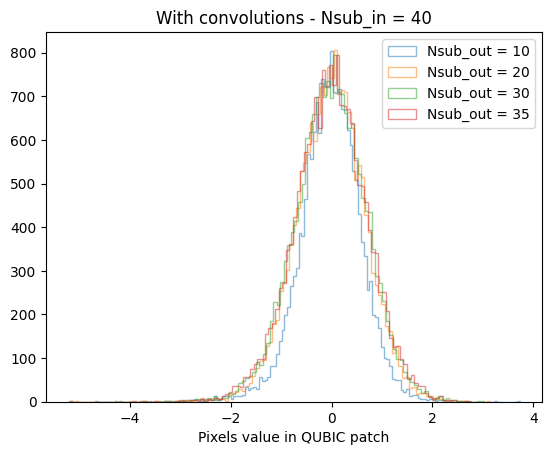

In [17]:
plt.figure()
for i, ihist in enumerate(hist_list):
    print(nsub_[i], ihist[0])
    plt.hist(ihist, bins='auto',histtype='step',label=f'Nsub_out = {nsub_[i]}', alpha=0.5)
plt.legend()
plt.xlabel('Pixels value in QUBIC patch')
plt.title('With convolutions - Nsub_in = 40')